# E-commerce — Выявление профилей потребления

`Заказчик`: Интернет-магазин «Пока все ещё тут», специализируетющийся на продаже товаров для дома и быта    

`Цель исследования`: Сегментация покупателей на основе истории их покупок для целей разработки более персонализированных предложений для покупателей    

`Входные данные`: данные о транзакциях интернет-магазина

`Задачи`: 1) разделить товары на категории; 2) выделить сегменты покупателей; 3) описать профили потребления покупателей по выделенным сегментам; 4) разработать рекомендации по таргетингу.

<h1>Содержание проекта<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Исследовательский-анализ-данных-(EDA)" data-toc-modified-id="Исследовательский-анализ-данных-(EDA)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследовательский анализ данных (EDA)</a></span></li><li><span><a href="#Разделение-товаров-на-категории" data-toc-modified-id="Разделение-товаров-на-категории-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Разделение товаров на категории</a></span></li><li><span><a href="#Кластеризация-клиентов" data-toc-modified-id="Кластеризация-клиентов-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Кластеризация клиентов</a></span></li><li><span><a href="#Оценка-корректности-сегментации-покупателей-с-помощью-проверки-гипотез" data-toc-modified-id="Оценка-корректности-сегментации-покупателей-с-помощью-проверки-гипотез-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Оценка корректности сегментации покупателей с помощью проверки гипотез</a></span><ul class="toc-item"><li><span><a href="#Проверка-гипотезы-о-различии-средних-чеков-покупателей-разных-сегментов" data-toc-modified-id="Проверка-гипотезы-о-различии-средних-чеков-покупателей-разных-сегментов-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Проверка гипотезы о различии средних чеков покупателей разных сегментов</a></span></li><li><span><a href="#Проверка-гипотезы-о-различии-среднемесячного-объема-продаж-(оборота-магазина)-в-разных-сегментах" data-toc-modified-id="Проверка-гипотезы-о-различии-среднемесячного-объема-продаж-(оборота-магазина)-в-разных-сегментах-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Проверка гипотезы о различии среднемесячного объема продаж (оборота магазина) в разных сегментах</a></span></li></ul></li><li><span><a href="#Выводы-и-рекомендации" data-toc-modified-id="Выводы-и-рекомендации-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Выводы и рекомендации</a></span></li><li><span><a href="#Дополнительные-материалы" data-toc-modified-id="Дополнительные-материалы-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Дополнительные материалы</a></span></li></ul></div>

## Предобработка данных

Импортируем библиотеки

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
import numpy as np
from scipy import stats as st
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Уберем прокрутку вывода результатов ячейки

In [3]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

Улучшим читаемость выводимых в таблицах данных

In [4]:
pd.set_option("max_colwidth", 120)
pd.options.display.float_format = '{:,.2f}'.format

Сохраним копию изначального датасета

In [5]:
initial_data = df.copy()

Ознакомимся с данными

In [6]:
df[0:15]

,date,customer_id,order_id,product,quantity,price
0,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.00
1,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12, h25",1,194.00
2,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.00
3,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.00
4,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.00
5,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Шеффлера Лузеана d-9 см,1,164.00
6,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Юкка нитчатая d-12 см h-25-35 см,1,134.00
7,2018100108,375e0724-f033-4c76-b579-84969cf38ee2,68479,Настенная сушилка для белья Gimi Brio Super 100,1,824.00
8,2018100108,6644e5b4-9934-4863-9778-aaa125207701,68478,"Таз пластмассовый 21,0 л круглый ""Водолей"" С614, 1404056",1,269.00
9,2018100109,c971fb21-d54c-4134-938f-16b62ee86d3b,68480,Чехол для гладильной доски Colombo Persia Beige 130х50 см из хлопка 5379,1,674.00


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6737 entries, 0 to 6736
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         6737 non-null   int64  
 1   customer_id  6737 non-null   object 
 2   order_id     6737 non-null   int64  
 3   product      6737 non-null   object 
 4   quantity     6737 non-null   int64  
 5   price        6737 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 315.9+ KB


Пропусков в данных нет.

Некорректный формат только в столбце с датой, изменим его

In [8]:
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d%H', errors='raise')

Проверим датасет на наличие дубликатов

In [9]:
df.duplicated().sum()

0

## Исследовательский анализ данных (EDA)

Оценка размера датасета, временного периода, за который представлены данные.  
Количество уникальных товаров, уникальных покупателей, уникальных заказов.  
Проверка данных на наличие аномалий, ошибок и их обработка, очистка.  
Распределение суммы заказа, распределение стоимости товаров, распределение продаж по месяцам, единовременые продажи в больших количествах, единовременные продажи на большую сумму.  

В прдставленном датасете у нас 6 столбцов и 6737 строк.   
Оценим временной период, за который представлены данные.

In [10]:
print(df['date'].min())
print(df['date'].max())

2018-10-01 00:00:00
2019-10-31 16:00:00


Данные представлены за 13 месяцев.  
Чтобы данные октября 2018 и октября 2019 не сливались при группировке данных, создадим столбец с годом и месяцем

In [11]:
df['purchase_month'] = df['date'].astype('datetime64[M]')
df['order_month'] = df['date'].astype('datetime64[M]')
df['order_month'] = df['order_month'].dt.strftime('%Y-%m')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6737 entries, 0 to 6736
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            6737 non-null   datetime64[ns]
 1   customer_id     6737 non-null   object        
 2   order_id        6737 non-null   int64         
 3   product         6737 non-null   object        
 4   quantity        6737 non-null   int64         
 5   price           6737 non-null   float64       
 6   purchase_month  6737 non-null   datetime64[ns]
 7   order_month     6737 non-null   object        
dtypes: datetime64[ns](2), float64(1), int64(2), object(3)
memory usage: 421.2+ KB


In [13]:
df.sample(5)

,date,customer_id,order_id,product,quantity,price,purchase_month,order_month
6243,2019-09-03 12:00:00,4dcc1780-6c61-4e40-8fcd-dc3722f87db9,72491,Амариллис Red Lion темно-красный в горшке d-12 см 1 луковица,1,389.00,2019-09-01,2019-09
383,2018-10-23 13:00:00,4d93d3f6-8b24-403b-a74b-f5173e40d7db,68728,Сушилка для белья напольная Gimi Modular 3 Lux Silver,1,"1,724.00",2018-10-01,2018-10
4727,2019-06-06 13:00:00,1d6c8c1f-a799-4418-9af2-1ded47d7a85c,14833,"Рассада Патиссона сорт НЛО Белый, кассета по 6шт",1,120.00,2019-06-01,2019-06
1729,2019-02-07 12:00:00,c971fb21-d54c-4134-938f-16b62ee86d3b,70140,Контейнер для мусора ДОМИНИК CURVER 25 л серебристый 05322-877,10,748.00,2019-02-01,2019-02
6446,2019-09-28 03:00:00,0b2157e5-101e-4e0e-bfaf-7340ed23e574,72788,Скатерть Towa Co Ажурная Presea прямоуголная 120х150 см сепия 5514,1,637.00,2019-09-01,2019-09


In [14]:
df.groupby('order_month')['order_id'].count()

order_month
2018-10     567
2018-11     474
2018-12     381
2019-01     226
2019-02     427
2019-03     502
2019-04     767
2019-05     868
2019-06    1396
2019-07     400
2019-08     221
2019-09     251
2019-10     257
Name: order_id, dtype: int64

In [15]:
def countplot_creator(data, parameter, title, xlabel, figsize, rotation):
    plt.figure(figsize=figsize)
    sns.countplot(data=data, x=parameter, palette='pastel')
    plt.xticks(rotation=rotation, ha="right")
    plt.title('Распределение количества ' + title)
    plt.xlabel(xlabel)
    plt.ylabel('Количество')
    plt.show()

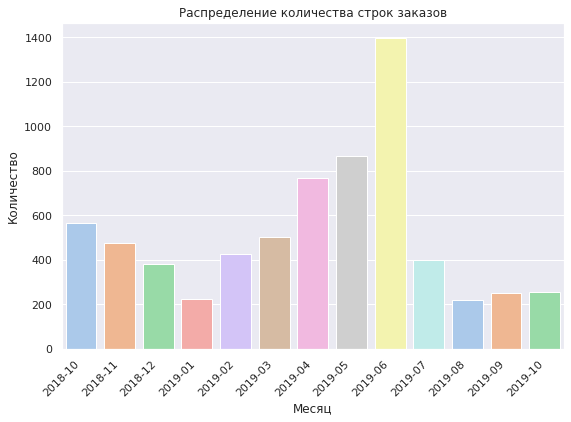

In [16]:
countplot_creator(df, 'order_month', 'строк заказов', 'Месяц', (9, 6), 45)

В июне был всплеск, максимальное количество строк заказов

Добавим стобец с суммой

In [17]:
df['total'] = df['quantity'] * df['price']

Посмотрим на описательные статистики

In [18]:
df[['quantity', 'price', 'total']].describe()

,quantity,price,total
count,"6,737.00","6,737.00","6,737.00"
mean,2.50,462.03,720.09
std,15.27,871.30,"8,352.10"
min,1.00,9.00,9.00
25%,1.00,101.00,120.00
50%,1.00,135.00,162.00
75%,1.00,398.00,600.00
max,"1,000.00","14,917.00","675,000.00"


In [19]:
df[df['quantity'] == df['quantity'].max()]

,date,customer_id,order_id,product,quantity,price,purchase_month,order_month,total
5456,2019-06-18 15:00:00,312e9a3e-5fca-43ff-a6a1-892d2b2d5ba6,71743,"Вантуз с деревянной ручкой d14 см красный, Burstenmann, 0522/0000",1000,675.00,2019-06-01,2019-06,"675,000.00"


По минимальным значениям аномалий нет, а по максимальным значениям необходимо посмотреть выбросы. Например, покупку 1000 вантузов.  
Считаю, что выбросы логичнее смотреть по категориям товаров (после их выделения).

In [20]:
df.groupby('order_month')['total'].sum().reset_index()

,order_month,total
0,2018-10,"420,754.00"
1,2018-11,"371,180.00"
2,2018-12,"402,768.00"
3,2019-01,"284,721.00"
4,2019-02,"345,454.00"
5,2019-03,"320,018.00"
6,2019-04,"381,915.00"
7,2019-05,"306,744.00"
8,2019-06,"1,086,681.00"
9,2019-07,"276,547.00"


In [21]:
def barplot_creator(data, x_parameter, y_parameter, estimator, title, xlabel, ylabel, figsize, rotation):
    plt.figure(figsize=figsize)
    sns.barplot(data=data, x=x_parameter, y=y_parameter, estimator=estimator, palette='pastel')
    plt.xticks(rotation=rotation, ha="right")
    plt.title('Распределение' + title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

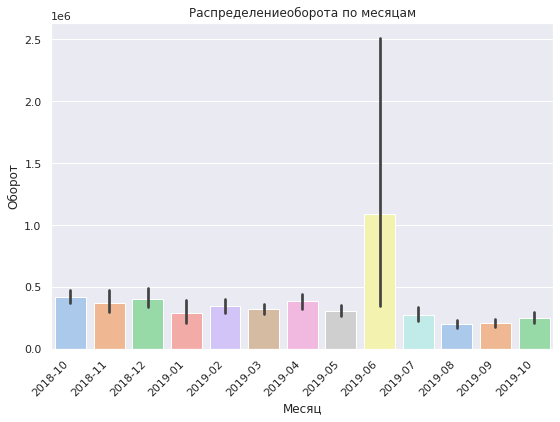

In [22]:
barplot_creator(df, 'order_month', 'total', sum, 'оборота по месяцам', 'Месяц', 'Оборот', (9, 6), 45)

По обороту, как и по количеству строк заказа всплеск в июне.

In [23]:
print('Количество уникальных товаров, представленных в датасете - ', df['product'].nunique())

Количество уникальных товаров, представленных в датасете -  2343


In [24]:
print('В среднем каждый продукт за 13 месяцев продался {:.2f} раза'.format(len(df)/df['product'].nunique()))

В среднем каждый продукт за 13 месяцев продался 2.88 раза


Невысокая оборачивоемость товара

In [25]:
print('Количество уникальных заказов, представленных в датасете - ', df['order_id'].nunique())

Количество уникальных заказов, представленных в датасете -  2784


In [26]:
print('Количество уникальных покупателей, представленных в датасете - ', df['customer_id'].nunique())

Количество уникальных покупателей, представленных в датасете -  2451


In [27]:
print('В среднем на каждого уникального покупателя за 13 месяцев приходится {:.2f} заказов'.format(df['order_id'].nunique()/df['customer_id'].nunique()))

В среднем на каждого уникального покупателя за 13 месяцев приходится 1.14 заказов


Покупатели редко возвращаются

In [28]:
print('В среднем на каждый уникальный заказ приходится {:.2f} строк'.format(len(df)/df['order_id'].nunique()))

В среднем на каждый уникальный заказ приходится 2.42 строк


## Разделение товаров на категории

Приведем наименования продуктов к нижнему регистру, чтобы сократить количество дубликатов

In [29]:
df['product'] = df['product'].str.lower()
df.sample()

,date,customer_id,order_id,product,quantity,price,purchase_month,order_month,total
1371,2018-12-26 11:00:00,bc36411d-ab04-436f-87a5-e866a516508a,69611,гладильная доска ника lora fashion hlf 123х46 см,1,"1,912.00",2018-12-01,2018-12,"1,912.00"


Выделим категории продуктов

In [30]:
key_words_plants = ['растение', 'комнатн', 'd-', 'd1', 'h25', 'h30', 'h-', 'нидерланды', 'бегония', 'цикламен']
for word in key_words_plants:
    df.loc[df['product'].str.contains(word), 'product_category'] = 'Растение'

Посмотрим, какое количесво строк содержит слово "рассада" в наименовании и стоит ли выделять рассаду в отдельную от Растений категорию.

In [31]:
print('{:.0f} строк содержит слово "рассада" в наименовании, это {:.2%} датасета'.format(
    df[df['product'].str.contains('рассада')]['product'].nunique(),
    len(df[df['product'].str.contains('рассада')]) / len(df)))

221 строк содержит слово "рассада" в наименовании, это 23.73% датасета


Имеет смысл выделить рассаду в отдельную категорию.

In [32]:
key_words_bags = ['сумка', 'тележк']
for word in key_words_bags:
    df.loc[df['product'].str.contains(word), 'product_category'] = 'Сумки'

In [33]:
key_words_seedlings = ['рассада', 'кассет', 'объем', 'горшк', 'крупноцветк', 'ампельн', 'фуксия', 'горох', 'клубник',
                       'петуния', 'вербена', 'пеларгония', 'калибрахоа', 'томат', 'бакопа', 'кориандр', 'кашпо', '46600107',
                       'роза', 'дыня', 'рукола', 'капуста', 'осина', 'черенок', '0,1 г', '0,5 г', '465009', 'волгоградец',
                      'вербейник', 'гвоздика', 'штук в упаковке', 'тюльпан']
for word in key_words_seedlings:
    df.loc[df['product'].str.contains(word), 'product_category'] = 'Рассада'

In [34]:
key_words_household = ['щетк', 'коврик', 'сушилк', 'швабр', 'гладил', 'подрукавник', 'стремянк', 'ковш', 'совок', '180700',
                       'чехол', 'термометр', 'скатерт', 'салфетк', 'ведр', 'короб', 'таз', 'кофр', 'ролик', 'окон ', 'мусор',
                      'перчатк', 'котел', 'ткань', 'корыто', 'веник', 'тряпк', 'прищеп', 'сметка', 'вантуз', 'шнур',
                      'окномойка', 'зажигал', 'губка', 'сетка', 'ерш', 'ёрш', 'насадка']
for word in key_words_household:
    df.loc[df['product'].str.contains(word), 'product_category'] = 'Хозтовары'

In [35]:
key_words_dishes = ['тарелка', 'luminarc', 'acr', 'кружка', 'pasabahce', 'кастрюл', 'сковород', 'кувшин', 
                    'емкость', 'банка', 'салатник', 'стакан', 'миска', 'фужер', 'торт', 'сахарница', 'набор посуды']
for word in key_words_dishes:
    df.loc[df['product'].str.contains(word), 'product_category'] = 'Посуда'

In [36]:
key_words_kitchen = ['нож', 'половник', 'столов', 'scovo', 'ложк', 'штопор', 'выпеч', 'экран', 'яйца', 'форм',
                    'термос', 'терк', 'картофел', 'лоток', 'разделочная', 'рыбочистка', 'крышка', 'сито', 'соковарк',
                     'скалка', 'кондитер', 'венчик', 'овощечистк', 'отделитель', 'хлебниц', 'лопатк', 'салфетница',
                    'сотейник', 'чеснока', 'картофел', 'мантоварк', 'толкушка', 'бидон', 'просеиватель', 'орехоколка', 
                     'скоба', 'контейнер']
for word in key_words_kitchen:
    df.loc[df['product'].str.contains(word), 'product_category'] = 'Кухня'

In [37]:
key_words_bathroom = [' ванн', 'дозатор', 'ванна ', 'туалет']
for word in key_words_bathroom:
    df.loc[df['product'].str.contains(word), 'product_category'] = 'Ванная'

In [38]:
key_words_house = ['муляж', 'искусственн', 'простыня', 'wellness', 'плечики', 'вешал', 'одеяло', 'шило',
                   'декор', 'qwerty', 'корзин', 'комод', 'сверло', 'штор', 'урна ', 'пепельниц', 'ковер', 'стеллаж ', 'пуф',
                  'этажерка', 'петля', 'мебел', 'инструмент', 'угольник', 'крепеж', 'стяжка', 'шпагат', 'пружин', 'фоторамка',
                   'ящик', 'стирк', 'сварка', 'светильник', 'наматрацник', 'пакет', 'покрывало', 'крючок', 'обув', 'фал ',
                  'уголок', 'завертка', 'штангенциркуль', 'ключница', 'ковёр', 'линейка', 'напильник', 'рассекатель', 'сверел',
                  'подголовник', 'фиксатор-шар', 'подставка', 'решетка', 'бак для белья']
for word in key_words_house:
    df.loc[df['product'].str.contains(word), 'product_category'] = 'Дом'

In [39]:
key_words_devices = ['утюг', 'весы', 'миксер', 'фен', 'пылесос', 'чайник', 'электрич']
for word in key_words_devices:
    df.loc[df['product'].str.contains(word), 'product_category'] = 'Бытовая_техника'

In [40]:
key_words_chemicals = ['средство', 'паста', 'мыло', 'порошок', 'концентрат', 'бальзам ', 'ополаскиватель', 'крем ', 
                       'маска ', 'гель ', 'соль', 'кондиционер', 'антижир']
for word in key_words_chemicals:
    df.loc[df['product'].str.contains(word), 'product_category'] = 'Бытовая_химия'

In [41]:
print('Итого выделили {:.0f} категорий: \n'.format(df['product_category'].nunique()), df['product_category'].unique().tolist())

Итого выделили 10 категорий: 
 ['Рассада', 'Растение', 'Хозтовары', 'Дом', 'Посуда', 'Кухня', 'Сумки', 'Ванная', 'Бытовая_техника', 'Бытовая_химия']


In [42]:
df['product_category'].value_counts()

Рассада            3594
Хозтовары          1083
Дом                 751
Сумки               453
Растение            334
Посуда              212
Кухня               151
Ванная               81
Бытовая_техника      40
Бытовая_химия        38
Name: product_category, dtype: int64

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6737 entries, 0 to 6736
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              6737 non-null   datetime64[ns]
 1   customer_id       6737 non-null   object        
 2   order_id          6737 non-null   int64         
 3   product           6737 non-null   object        
 4   quantity          6737 non-null   int64         
 5   price             6737 non-null   float64       
 6   purchase_month    6737 non-null   datetime64[ns]
 7   order_month       6737 non-null   object        
 8   total             6737 non-null   float64       
 9   product_category  6737 non-null   object        
dtypes: datetime64[ns](2), float64(2), int64(2), object(4)
memory usage: 526.5+ KB


Пропусков нет

In [44]:
df.sample(5)

,date,customer_id,order_id,product,quantity,price,purchase_month,order_month,total,product_category
4285,2019-06-02 10:00:00,1d6c8c1f-a799-4418-9af2-1ded47d7a85c,14833,"рассада кабачка сорт аэронавт, кассета по 6шт",1,120.00,2019-06-01,2019-06,120.00,Рассада
5819,2019-07-10 23:00:00,42d3cb27-6519-4627-9b4a-5aa8ee600203,14897,базилик зеленый тонус d-7 см,1,15.00,2019-07-01,2019-07,15.00,Растение
5818,2019-07-10 22:00:00,1af9eb83-687e-4832-8805-9a910eb395f8,71934,сумка-тележка 3-х колесная gimi tris красная,1,"2,699.00",2019-07-01,2019-07,"2,699.00",Сумки
4891,2019-06-08 13:00:00,1d6c8c1f-a799-4418-9af2-1ded47d7a85c,14833,"рассада кабачка сорт аэронавт, кассета по 6шт",1,120.00,2019-06-01,2019-06,120.00,Рассада
319,2018-10-19 12:00:00,4d93d3f6-8b24-403b-a74b-f5173e40d7db,68690,чехол для гладильной доски zalger 520125 140х58 см хлопок войлок для доски до 135х53 см,3,299.00,2018-10-01,2018-10,897.00,Хозтовары


Очистим выбросы по выделенным категориям.  
Посчитаем квантили и посмотрим на распределения

In [45]:
def parameter_description(dataframe, parameter):
    q1 = dataframe[parameter].quantile(0.25)
    q3 = dataframe[parameter].quantile(0.75)
    iqr = q3 - q1
    bottom_lim = q1 - 1.5 * iqr
    up_limit = q3 + 1.5 * iqr
    print('Нижний ус', parameter, ' - ', bottom_lim)
    print('Верхний ус', parameter, ' - ', up_limit)
    print()
    print(dataframe[parameter].describe())

def distplot_creator(dataframe, parameter):
    plt.figure(figsize=(6, 4))
    print(sns.distplot(dataframe[parameter], color='#2E8B57'))
    plt.title('Распределение параметра ' + parameter)
    plt.show()

Рассада quantity
Нижний ус quantity  -  1.0
Верхний ус quantity  -  1.0

count   3,594.00
mean        1.32
std         1.51
min         1.00
25%         1.00
50%         1.00
75%         1.00
max        43.00
Name: quantity, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


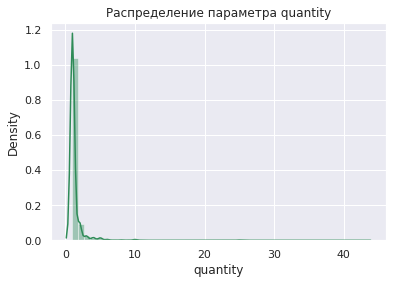

Растение quantity
Нижний ус quantity  -  1.0
Верхний ус quantity  -  1.0

count   334.00
mean      1.77
std       3.31
min       1.00
25%       1.00
50%       1.00
75%       1.00
max      45.00
Name: quantity, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


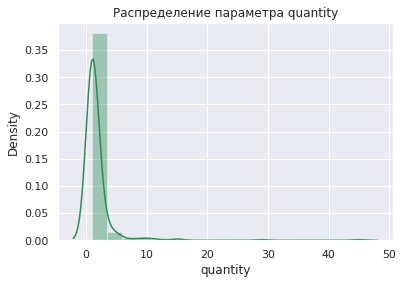

Хозтовары quantity
Нижний ус quantity  -  1.0
Верхний ус quantity  -  1.0

count   1,083.00
mean        3.37
std        31.07
min         1.00
25%         1.00
50%         1.00
75%         1.00
max     1,000.00
Name: quantity, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


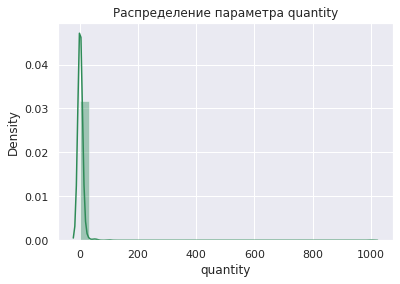

Дом quantity
Нижний ус quantity  -  -5.0
Верхний ус quantity  -  11.0

count   751.00
mean      7.56
std      23.80
min       1.00
25%       1.00
50%       1.00
75%       5.00
max     334.00
Name: quantity, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


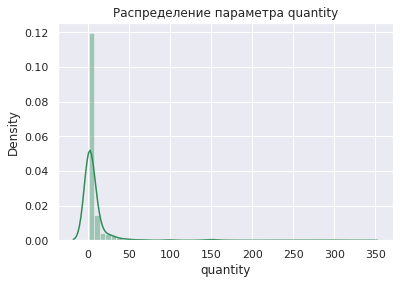

Посуда quantity
Нижний ус quantity  -  -3.5
Верхний ус quantity  -  8.5

count   212.00
mean      3.68
std       6.22
min       1.00
25%       1.00
50%       1.00
75%       4.00
max      60.00
Name: quantity, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


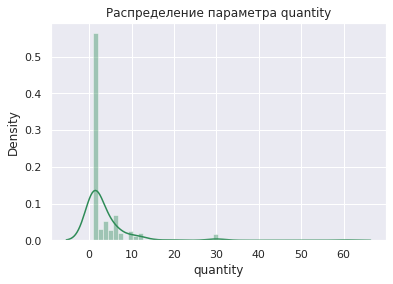

Кухня quantity
Нижний ус quantity  -  -0.5
Верхний ус quantity  -  3.5

count   151.00
mean      4.40
std      18.25
min       1.00
25%       1.00
50%       1.00
75%       2.00
max     200.00
Name: quantity, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


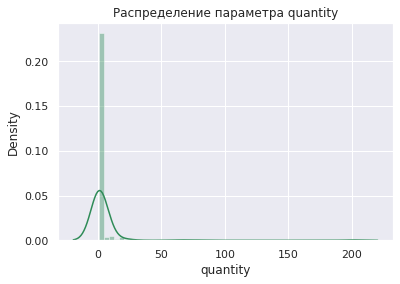

Сумки quantity
Нижний ус quantity  -  1.0
Верхний ус quantity  -  1.0

count   453.00
mean      1.13
std       2.63
min       1.00
25%       1.00
50%       1.00
75%       1.00
max      57.00
Name: quantity, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


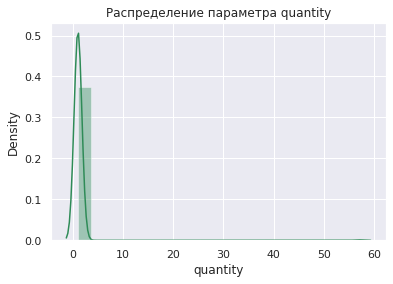

Ванная quantity
Нижний ус quantity  -  1.0
Верхний ус quantity  -  1.0

count   81.00
mean     1.37
std      2.56
min      1.00
25%      1.00
50%      1.00
75%      1.00
max     24.00
Name: quantity, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


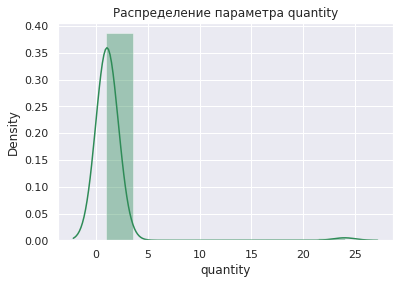

Бытовая_техника quantity
Нижний ус quantity  -  1.0
Верхний ус quantity  -  1.0

count   40.00
mean     1.05
std      0.32
min      1.00
25%      1.00
50%      1.00
75%      1.00
max      3.00
Name: quantity, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


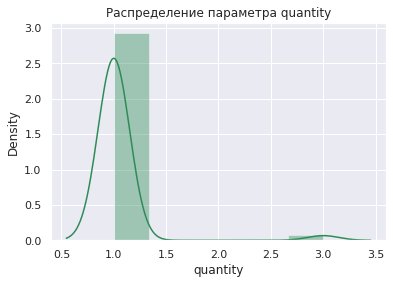

Бытовая_химия quantity
Нижний ус quantity  -  -0.5
Верхний ус quantity  -  3.5

count   38.00
mean     2.21
std      2.44
min      1.00
25%      1.00
50%      1.00
75%      2.00
max     10.00
Name: quantity, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


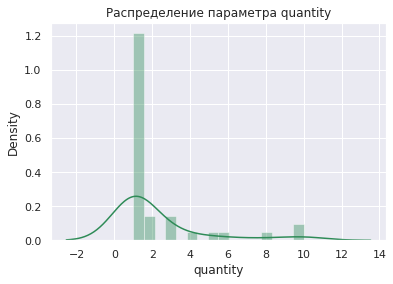

Рассада price
Нижний ус price  -  12.0
Верхний ус price  -  220.0

count   3,594.00
mean      130.93
std       164.25
min         9.00
25%        90.00
50%       120.00
75%       142.00
max     7,679.00
Name: price, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


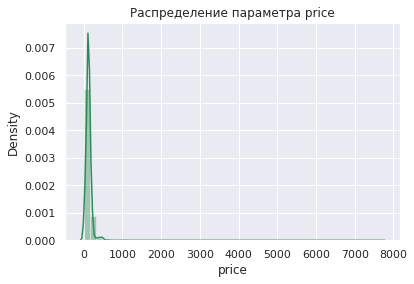

Растение price
Нижний ус price  -  -215.5
Верхний ус price  -  620.5

count     334.00
mean      301.23
std       442.95
min        14.00
25%        98.00
50%       134.00
75%       307.00
max     3,524.00
Name: price, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


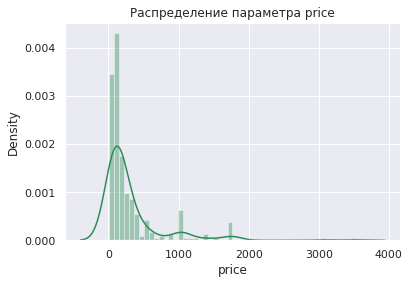

Хозтовары price
Нижний ус price  -  -1538.5
Верхний ус price  -  3201.5

count    1,083.00
mean       959.35
std      1,132.82
min         22.00
25%        239.00
50%        592.00
75%      1,424.00
max     14,917.00
Name: price, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


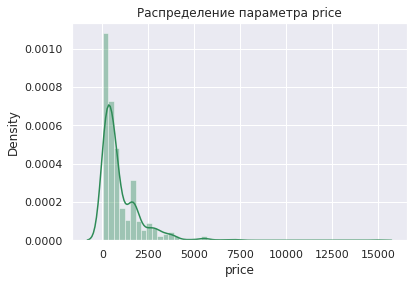

Дом price
Нижний ус price  -  -1127.25
Верхний ус price  -  1994.75

count     751.00
mean      553.30
std       948.33
min         9.00
25%        43.50
50%        86.00
75%       824.00
max     7,724.00
Name: price, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


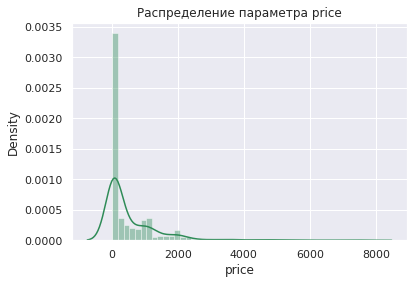

Посуда price
Нижний ус price  -  -328.0
Верхний ус price  -  790.0

count     212.00
mean      357.41
std       470.53
min        21.00
25%        91.25
50%       179.00
75%       370.75
max     2,399.00
Name: price, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


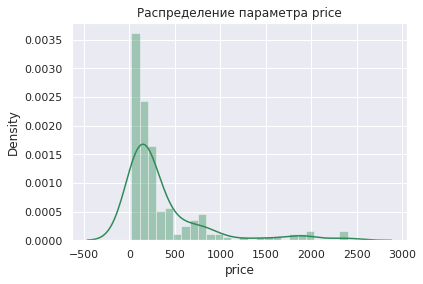

Кухня price
Нижний ус price  -  -472.25
Верхний ус price  -  1085.75

count     151.00
mean      438.82
std       611.61
min        19.00
25%       112.00
50%       223.00
75%       501.50
max     5,512.00
Name: price, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


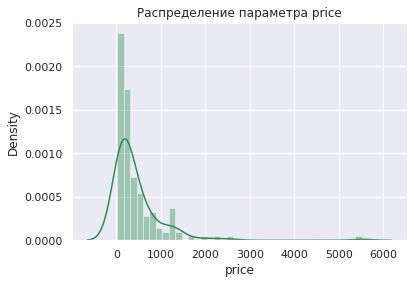

Сумки price
Нижний ус price  -  -1313.5
Верхний ус price  -  4986.5

count     453.00
mean    1,840.65
std     1,574.72
min       150.00
25%     1,049.00
50%     1,087.00
75%     2,624.00
max     8,737.00
Name: price, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


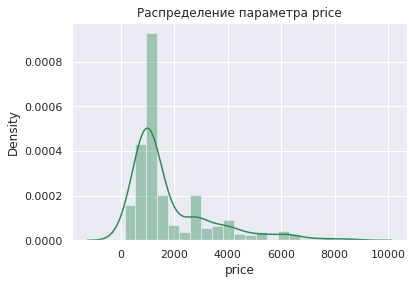

Ванная price
Нижний ус price  -  -926.0
Верхний ус price  -  2114.0

count      81.00
mean      842.74
std     1,061.73
min        59.00
25%       214.00
50%       434.00
75%       974.00
max     5,474.00
Name: price, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


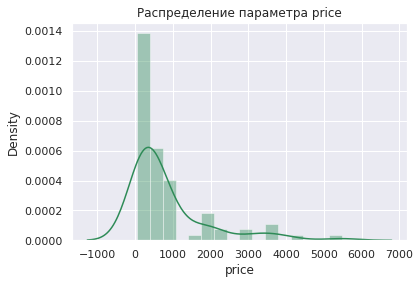

Бытовая_техника price
Нижний ус price  -  -197.875
Верхний ус price  -  1797.125

count      40.00
mean      868.77
std       561.13
min        52.00
25%       550.25
50%       832.00
75%     1,049.00
max     2,849.00
Name: price, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


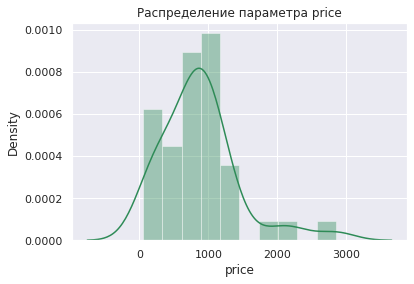

Бытовая_химия price
Нижний ус price  -  -167.5
Верхний ус price  -  516.5

count    38.00
mean    214.34
std     199.42
min      15.00
25%      89.00
50%     164.50
75%     260.00
max     899.00
Name: price, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


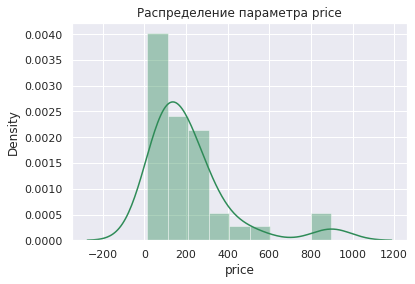

Рассада total
Нижний ус total  -  55.0
Верхний ус total  -  207.0

count   3,594.00
mean      164.46
std       237.01
min         9.00
25%       112.00
50%       120.00
75%       150.00
max     7,679.00
Name: total, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


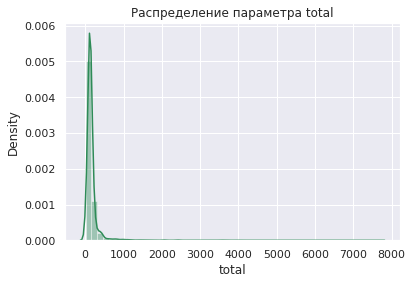

Растение total
Нижний ус total  -  -325.25
Верхний ус total  -  840.75

count      334.00
mean       452.05
std      1,012.24
min         14.00
25%        112.00
50%        175.50
75%        403.50
max     11,250.00
Name: total, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


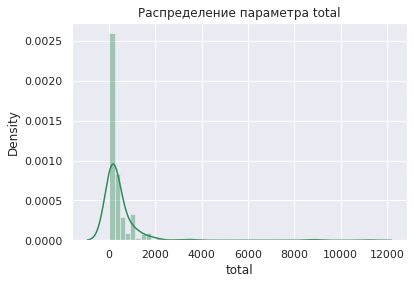

Хозтовары total
Нижний ус total  -  -1490.5
Верхний ус total  -  3521.5

count     1,083.00
mean      1,805.21
std      20,519.13
min          29.00
25%         389.00
50%         704.00
75%       1,642.00
max     675,000.00
Name: total, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


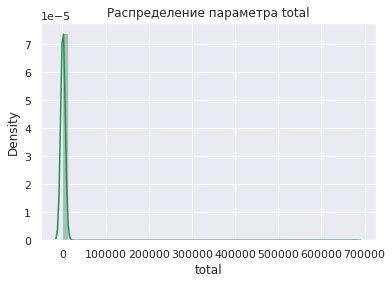

Дом total
Нижний ус total  -  -1478.0
Верхний ус total  -  2758.0

count      751.00
mean     1,128.77
std      3,046.86
min          9.00
25%        110.50
50%        450.00
75%      1,169.50
max     49,432.00
Name: total, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


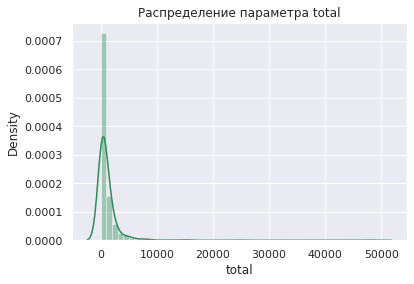

Посуда total
Нижний ус total  -  -835.75
Верхний ус total  -  1926.25

count     212.00
mean      710.29
std       817.69
min        22.00
25%       200.00
50%       447.50
75%       890.50
max     5,775.00
Name: total, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


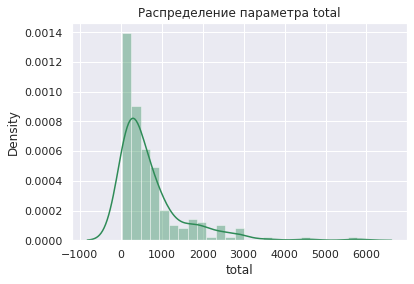

Кухня total
Нижний ус total  -  -1013.5
Верхний ус total  -  2106.5

count      151.00
mean     1,015.32
std      2,859.66
min         38.00
25%        156.50
50%        389.00
75%        936.50
max     29,248.00
Name: total, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


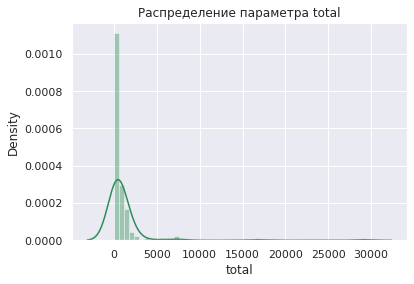

Сумки total
Нижний ус total  -  -1426.0
Верхний ус total  -  5174.0

count      453.00
mean     1,924.35
std      2,145.40
min        150.00
25%      1,049.00
50%      1,087.00
75%      2,699.00
max     32,718.00
Name: total, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


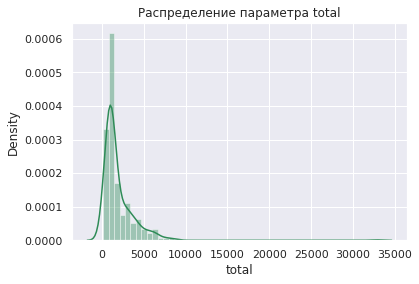

Ванная total
Нижний ус total  -  -901.0
Верхний ус total  -  2099.0

count      81.00
mean      985.56
std     1,262.32
min        59.00
25%       224.00
50%       448.00
75%       974.00
max     5,474.00
Name: total, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


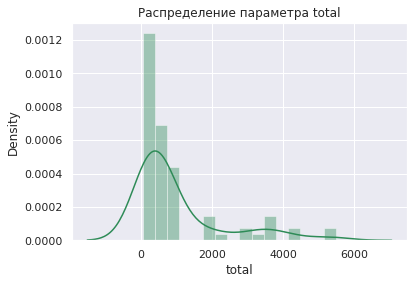

Бытовая_техника total
Нижний ус total  -  -197.875
Верхний ус total  -  1797.125

count      40.00
mean      871.38
std       557.47
min       156.00
25%       550.25
50%       832.00
75%     1,049.00
max     2,849.00
Name: total, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


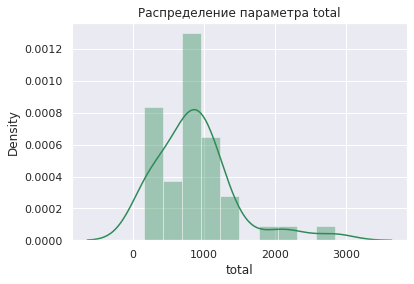

Бытовая_химия total
Нижний ус total  -  -296.0
Верхний ус total  -  856.0

count      38.00
mean      425.53
std       733.83
min        15.00
25%       136.00
50%       224.00
75%       424.00
max     4,495.00
Name: total, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


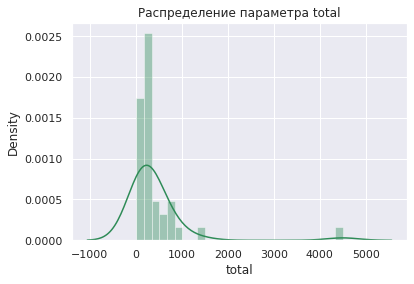

In [46]:
parametres = ['quantity', 'price', 'total']
for parameter in parametres:
    for category in df['product_category'].unique():
        print(category, parameter)
        parameter_description(df[df['product_category'] == category], parameter)
        print('========================')
        distplot_creator(df[df['product_category'] == category], parameter)

Видим выбросы из малого количества больших значений

Очистим от выбросов

In [47]:
seedlings = df[(df['product_category'] == 'Рассада') & (df['quantity'] <= 7) & (df['price'] <= 250) & (df['total'] <= 500)]
plants = df[(df['product_category'] == 'Растение') & (df['quantity'] <= 7) & (df['price'] <= 2000) & (df['total'] <= 2500)]
household = df[(df['product_category'] == 'Хозтовары') & (df['quantity'] <= 30) & (df['price'] <= 4500) & (df['total'] <= 6000)]
house = df[(df['product_category'] == 'Дом') & (df['quantity'] <= 50) & (df['price'] <= 2500) & (df['total'] <= 5000)]
dishes = df[(df['product_category'] == 'Посуда') & (df['quantity'] <= 15) & (df['price'] <= 1500) & (df['total'] <= 3500)]
kitchen = df[(df['product_category'] == 'Кухня') & (df['quantity'] <= 10) & (df['price'] <= 1500) & (df['total'] <= 3000)]
bags = df[(df['product_category'] == 'Сумки') & (df['quantity'] <= 2) & (df['price'] <= 7000)]
bathroom = df[(df['product_category'] == 'Ванная') & (df['quantity'] <= 5) & (df['price'] <= 4000)]
devices = df[df['product_category'] == 'Бытовая_техника']
chemicals = df[df['product_category'] == 'Бытовая_химия']

df = pd.concat([seedlings, plants, household, house, dishes, kitchen, bags, bathroom, devices, chemicals])

Еще раз посмотрим на распределения

Рассада quantity
Нижний ус quantity  -  1.0
Верхний ус quantity  -  1.0

count   3,422.00
mean        1.17
std         0.60
min         1.00
25%         1.00
50%         1.00
75%         1.00
max         7.00
Name: quantity, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


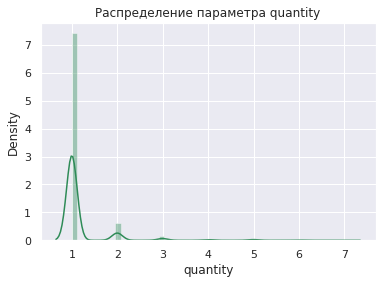

Растение quantity
Нижний ус quantity  -  1.0
Верхний ус quantity  -  1.0

count   320.00
mean      1.30
std       0.79
min       1.00
25%       1.00
50%       1.00
75%       1.00
max       6.00
Name: quantity, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


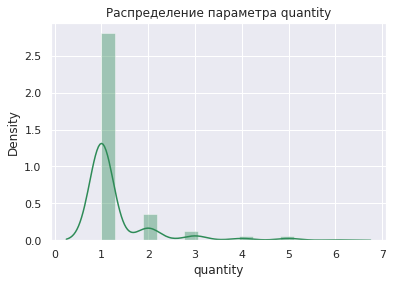

Хозтовары quantity
Нижний ус quantity  -  1.0
Верхний ус quantity  -  1.0

count   1,052.00
mean        1.88
std         3.31
min         1.00
25%         1.00
50%         1.00
75%         1.00
max        30.00
Name: quantity, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


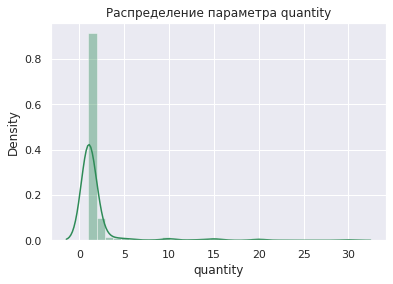

Дом quantity
Нижний ус quantity  -  -3.5
Верхний ус quantity  -  8.5

count   700.00
mean      4.72
std       7.89
min       1.00
25%       1.00
50%       1.00
75%       4.00
max      50.00
Name: quantity, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


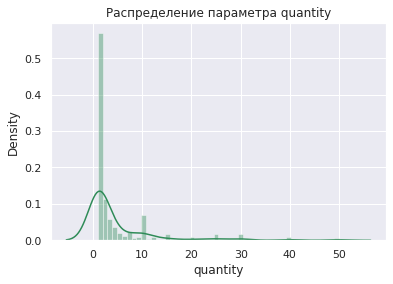

Посуда quantity
Нижний ус quantity  -  -3.5
Верхний ус quantity  -  8.5

count   194.00
mean      2.90
std       3.01
min       1.00
25%       1.00
50%       1.00
75%       4.00
max      15.00
Name: quantity, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


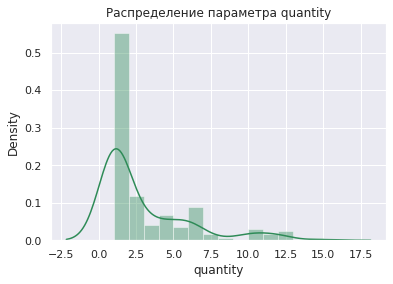

Кухня quantity
Нижний ус quantity  -  -0.5
Верхний ус quantity  -  3.5

count   137.00
mean      1.56
std       1.27
min       1.00
25%       1.00
50%       1.00
75%       2.00
max      10.00
Name: quantity, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


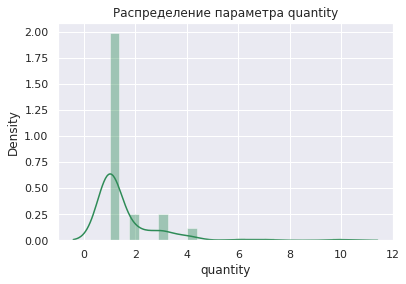

Сумки quantity
Нижний ус quantity  -  1.0
Верхний ус quantity  -  1.0

count   446.00
mean      1.01
std       0.11
min       1.00
25%       1.00
50%       1.00
75%       1.00
max       2.00
Name: quantity, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


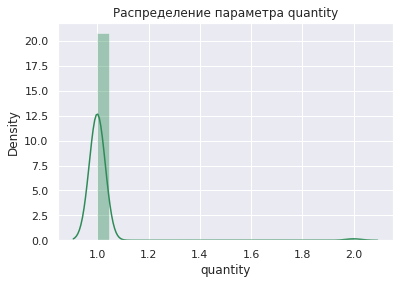

Ванная quantity
Нижний ус quantity  -  1.0
Верхний ус quantity  -  1.0

count   78.00
mean     1.09
std      0.29
min      1.00
25%      1.00
50%      1.00
75%      1.00
max      2.00
Name: quantity, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


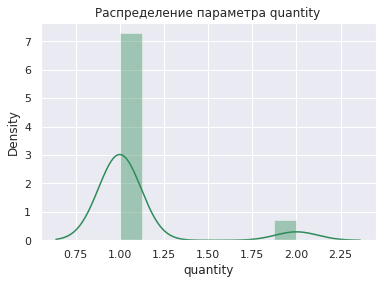

Бытовая_техника quantity
Нижний ус quantity  -  1.0
Верхний ус quantity  -  1.0

count   40.00
mean     1.05
std      0.32
min      1.00
25%      1.00
50%      1.00
75%      1.00
max      3.00
Name: quantity, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


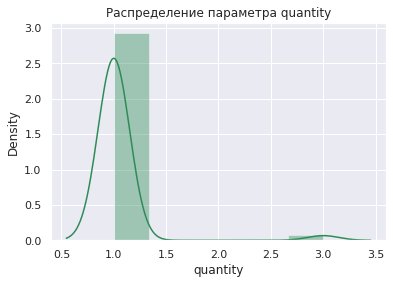

Бытовая_химия quantity
Нижний ус quantity  -  -0.5
Верхний ус quantity  -  3.5

count   38.00
mean     2.21
std      2.44
min      1.00
25%      1.00
50%      1.00
75%      2.00
max     10.00
Name: quantity, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


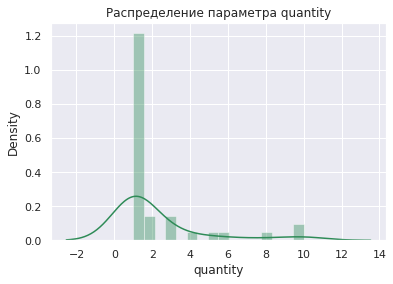

Рассада price
Нижний ус price  -  22.5
Верхний ус price  -  202.5

count   3,422.00
mean      118.40
std        43.80
min         9.00
25%        90.00
50%       120.00
75%       135.00
max       225.00
Name: price, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


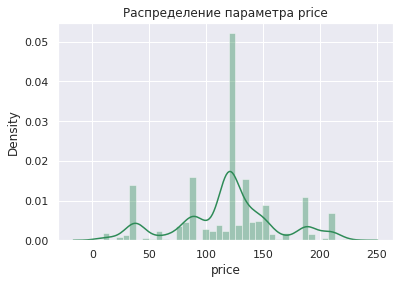

Растение price
Нижний ус price  -  -215.5
Верхний ус price  -  620.5

count     320.00
mean      278.92
std       364.90
min        14.00
25%        98.00
50%       134.00
75%       307.00
max     1,762.00
Name: price, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


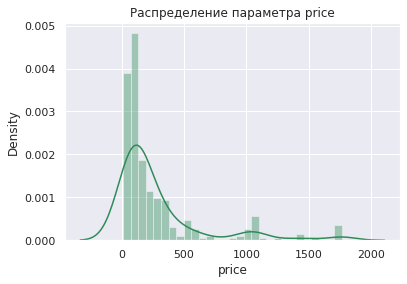

Хозтовары price
Нижний ус price  -  -1538.5
Верхний ус price  -  3201.5

count   1,052.00
mean      887.97
std       883.39
min        22.00
25%       239.00
50%       577.00
75%     1,424.00
max     4,499.00
Name: price, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


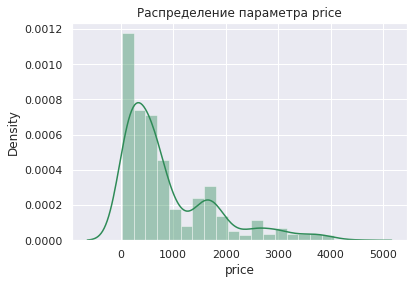

Дом price
Нижний ус price  -  -943.625
Верхний ус price  -  1687.375

count     700.00
mean      417.02
std       577.48
min         9.00
25%        43.00
50%        82.00
75%       700.75
max     2,399.00
Name: price, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


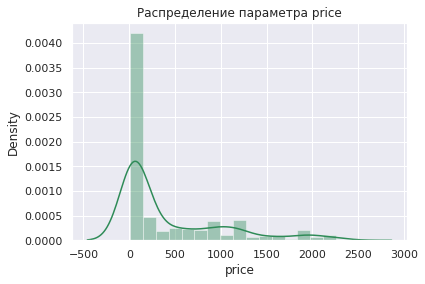

Посуда price
Нижний ус price  -  -218.5
Верхний ус price  -  609.5

count     194.00
mean      269.87
std       270.34
min        21.00
25%        92.00
50%       168.00
75%       299.00
max     1,499.00
Name: price, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


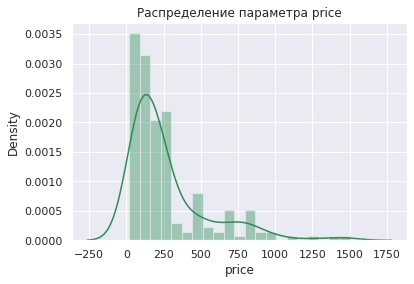

Кухня price
Нижний ус price  -  -401.0
Верхний ус price  -  1007.0

count     137.00
mean      364.75
std       356.35
min        19.00
25%       127.00
50%       202.00
75%       479.00
max     1,424.00
Name: price, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


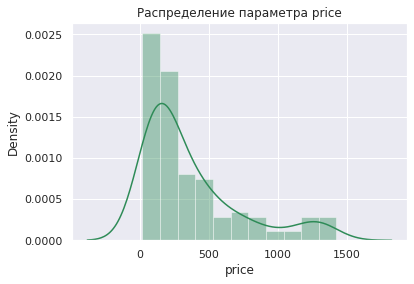

Сумки price
Нижний ус price  -  -1201.0
Верхний ус price  -  4799.0

count     446.00
mean    1,761.24
std     1,414.64
min       150.00
25%     1,049.00
50%     1,087.00
75%     2,549.00
max     6,809.00
Name: price, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


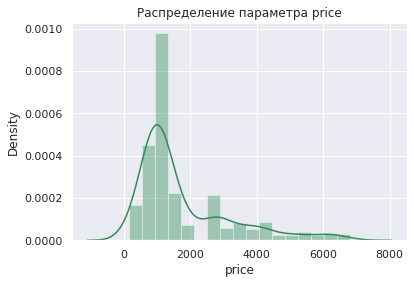

Ванная price
Нижний ус price  -  -942.25
Верхний ус price  -  2123.75

count      78.00
mean      749.36
std       859.56
min        59.00
25%       207.50
50%       423.00
75%       974.00
max     3,674.00
Name: price, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


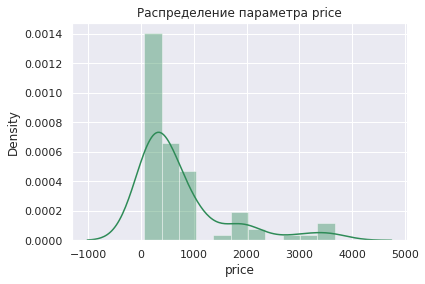

Бытовая_техника price
Нижний ус price  -  -197.875
Верхний ус price  -  1797.125

count      40.00
mean      868.77
std       561.13
min        52.00
25%       550.25
50%       832.00
75%     1,049.00
max     2,849.00
Name: price, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


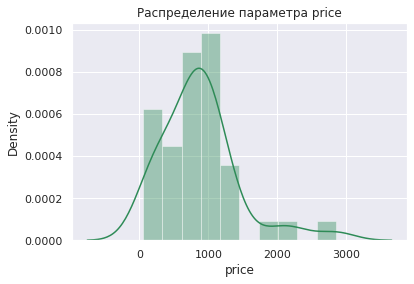

Бытовая_химия price
Нижний ус price  -  -167.5
Верхний ус price  -  516.5

count    38.00
mean    214.34
std     199.42
min      15.00
25%      89.00
50%     164.50
75%     260.00
max     899.00
Name: price, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


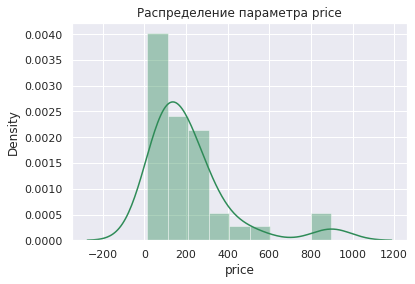

Рассада total
Нижний ус total  -  37.5
Верхний ус total  -  217.5

count   3,422.00
mean      132.20
std        61.74
min         9.00
25%       105.00
50%       120.00
75%       150.00
max       492.00
Name: total, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


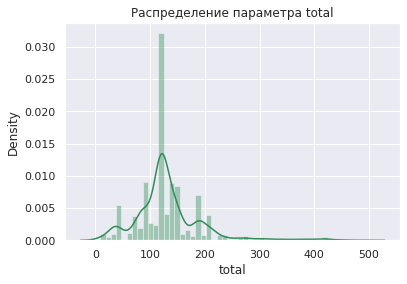

Растение total
Нижний ус total  -  -281.0
Верхний ус total  -  767.0

count     320.00
mean      321.39
std       386.27
min        14.00
25%       112.00
50%       164.00
75%       374.00
max     2,098.00
Name: total, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


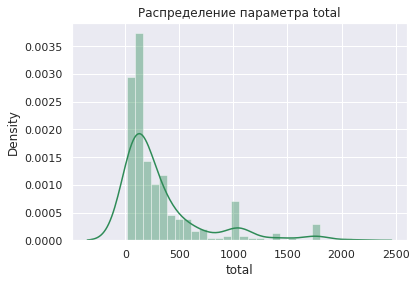

Хозтовары total
Нижний ус total  -  -1428.5
Верхний ус total  -  3375.5

count   1,052.00
mean    1,048.00
std       973.45
min        29.00
25%       373.00
50%       674.00
75%     1,574.00
max     5,420.00
Name: total, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


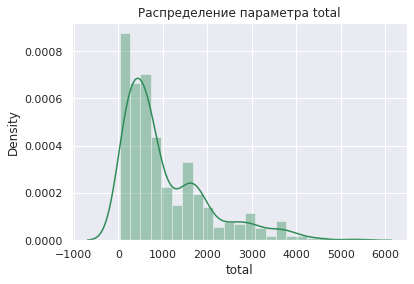

Дом total
Нижний ус total  -  -1201.0
Верхний ус total  -  2279.0

count     700.00
mean      668.81
std       775.47
min         9.00
25%       104.00
50%       408.50
75%       974.00
max     4,900.00
Name: total, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


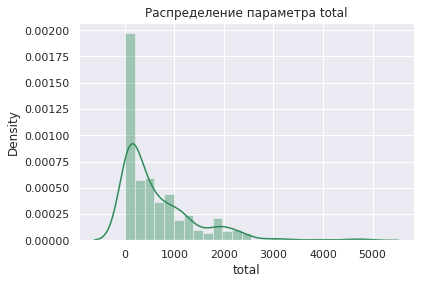

Посуда total
Нижний ус total  -  -665.0
Верхний ус total  -  1591.0

count     194.00
mean      545.08
std       550.79
min        22.00
25%       181.00
50%       344.50
75%       745.00
max     2,915.00
Name: total, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


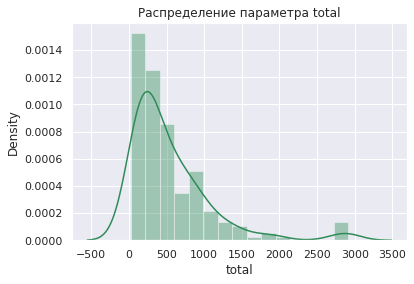

Кухня total
Нижний ус total  -  -678.5
Верхний ус total  -  1509.5

count     137.00
mean      489.88
std       454.95
min        38.00
25%       142.00
50%       352.00
75%       689.00
max     2,230.00
Name: total, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


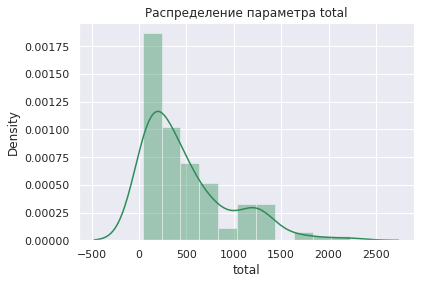

Сумки total
Нижний ус total  -  -1201.0
Верхний ус total  -  4799.0

count     446.00
mean    1,774.18
std     1,423.99
min       150.00
25%     1,049.00
50%     1,087.00
75%     2,549.00
max     6,809.00
Name: total, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


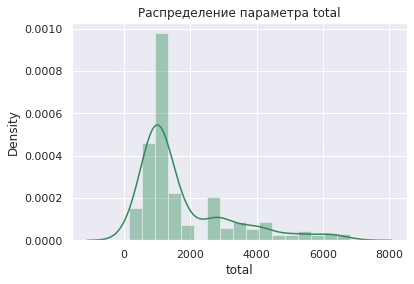

Ванная total
Нижний ус total  -  -901.0
Верхний ус total  -  2099.0

count      78.00
mean      834.56
std     1,009.54
min        59.00
25%       224.00
50%       445.00
75%       974.00
max     4,198.00
Name: total, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


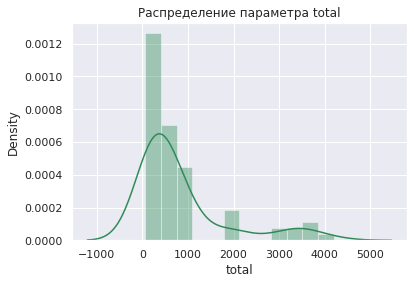

Бытовая_техника total
Нижний ус total  -  -197.875
Верхний ус total  -  1797.125

count      40.00
mean      871.38
std       557.47
min       156.00
25%       550.25
50%       832.00
75%     1,049.00
max     2,849.00
Name: total, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


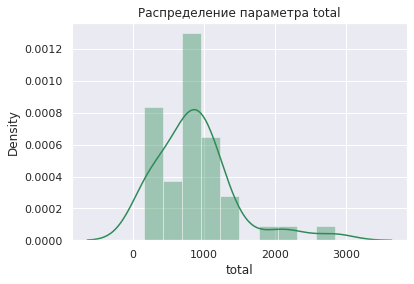

Бытовая_химия total
Нижний ус total  -  -296.0
Верхний ус total  -  856.0

count      38.00
mean      425.53
std       733.83
min        15.00
25%       136.00
50%       224.00
75%       424.00
max     4,495.00
Name: total, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


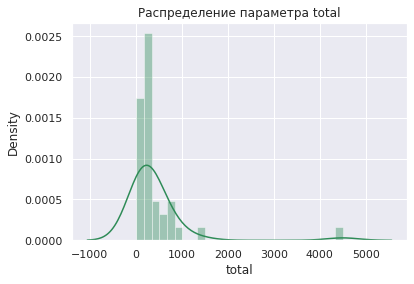

In [48]:
parametres = ['quantity', 'price', 'total']
for parameter in parametres:
    for category in df['product_category'].unique():
        print(category, parameter)
        parameter_description(df[df['product_category'] == category], parameter)
        print('========================')
        distplot_creator(df[df['product_category'] == category], parameter)

Теперь данные выглядят лучше

In [49]:
print('В процессе обработки выбросов исключили {:.2%} датасета'.format(1 - len(df)/len(initial_data)))

В процессе обработки выбросов исключили 4.60% датасета


Посморим на описательные статистики

In [50]:
df[['quantity', 'price', 'total']].describe()

,quantity,price,total
count,"6,427.00","6,427.00","6,427.00"
mean,1.73,421.61,498.86
std,3.22,734.64,801.15
min,1.00,9.00,9.00
25%,1.00,98.00,120.00
50%,1.00,135.00,150.00
75%,1.00,374.00,524.00
max,50.00,"6,809.00","6,809.00"


Посмотрим на динамику продаж (оборота) после исключения выбросов

In [51]:
df.groupby('order_month')['total'].sum().reset_index()

,order_month,total
0,2018-10,"346,774.00"
1,2018-11,"261,981.00"
2,2018-12,"321,886.00"
3,2019-01,"185,028.00"
4,2019-02,"262,915.00"
5,2019-03,"272,582.00"
6,2019-04,"272,999.00"
7,2019-05,"241,940.00"
8,2019-06,"298,497.00"
9,2019-07,"210,550.00"


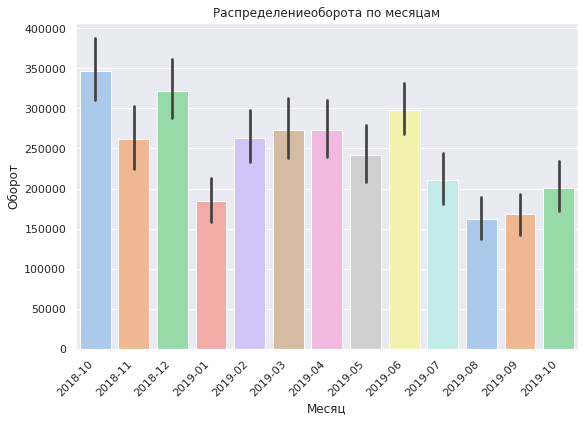

In [52]:
barplot_creator(df, 'order_month', 'total', sum, 'оборота по месяцам', 'Месяц', 'Оборот', (9, 6), 45)

Продажи выглядят более менее равномерными

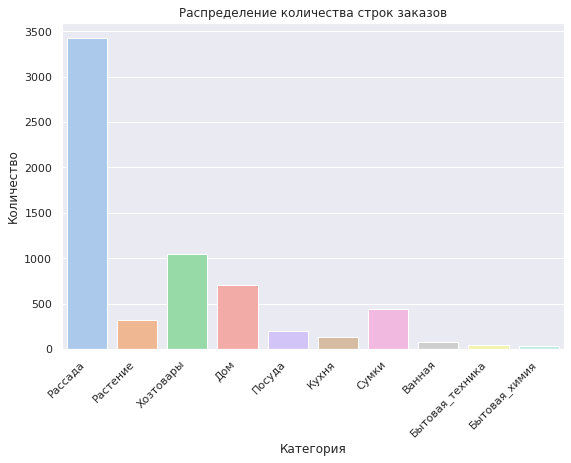

In [53]:
countplot_creator(df, 'product_category', 'строк заказов', 'Категория', (9, 6), 45)

В заказах чаще всего встречаются строки из категории "Рассада"

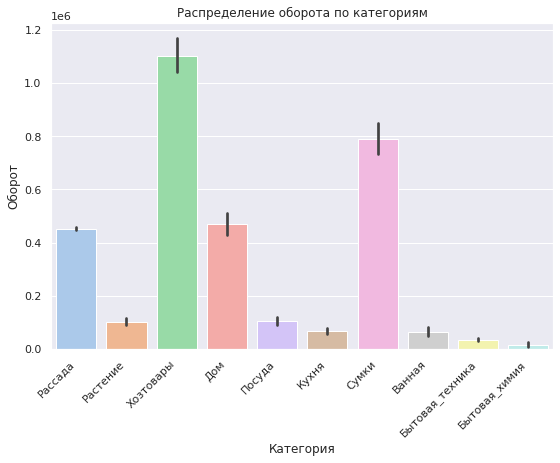

In [54]:
barplot_creator(df, 'product_category', 'total', sum, ' оборота по категориям', 'Категория', 'Оборот', (9, 6), 45)

Наибольшую часть оборота магазина составляют категории "Хозтовары" и "Сумки"

Посмотрим, наблюдается ли сезонность в категориях товаров

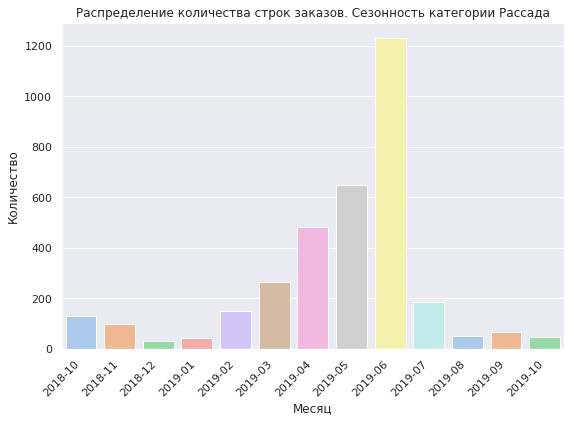

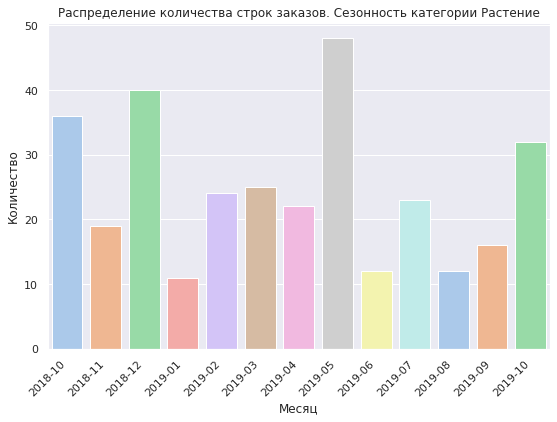

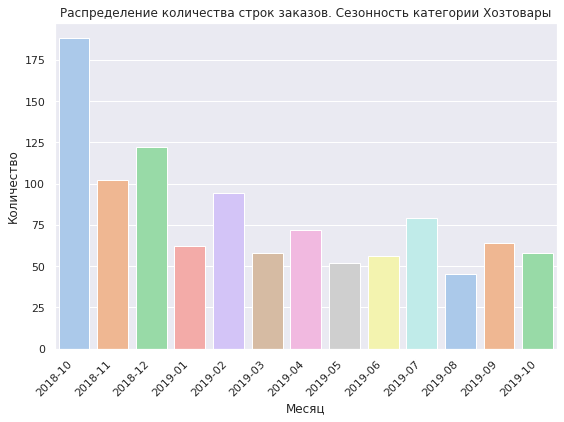

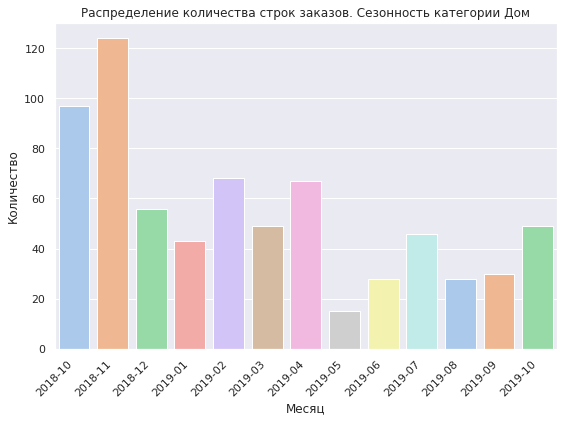

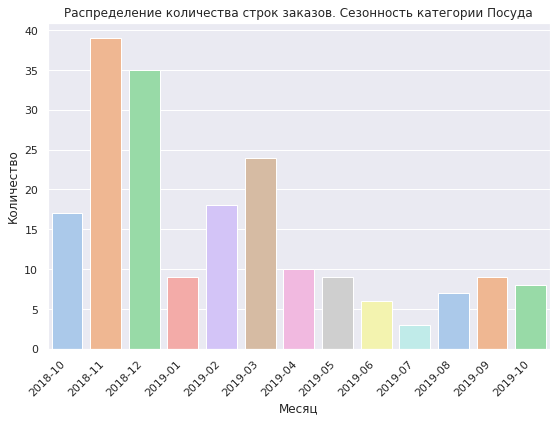

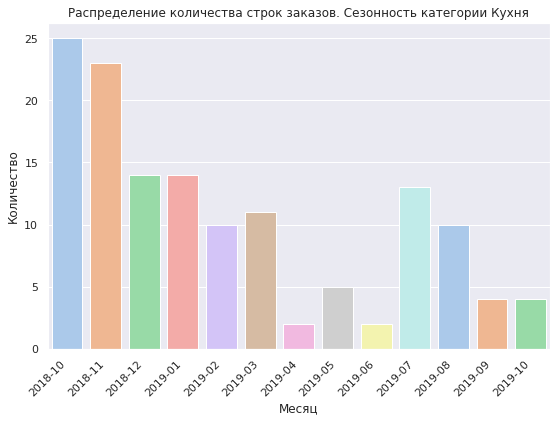

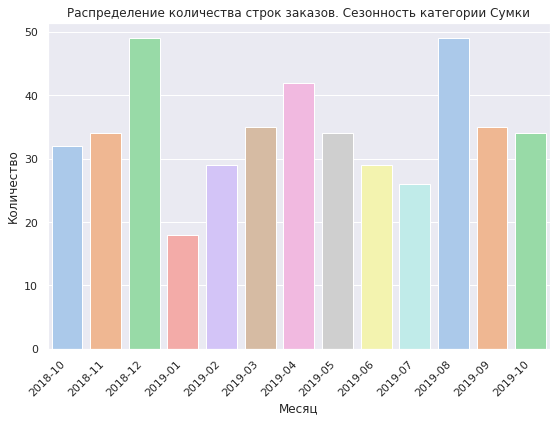

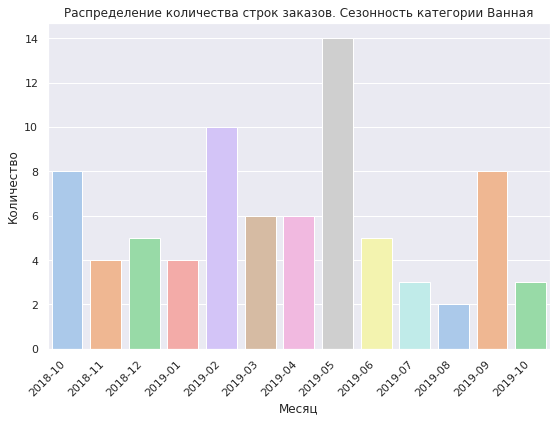

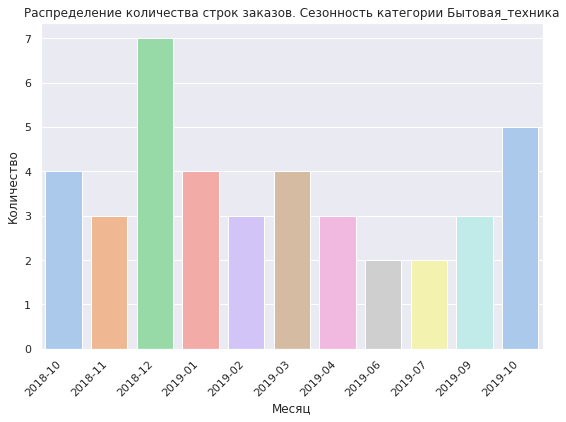

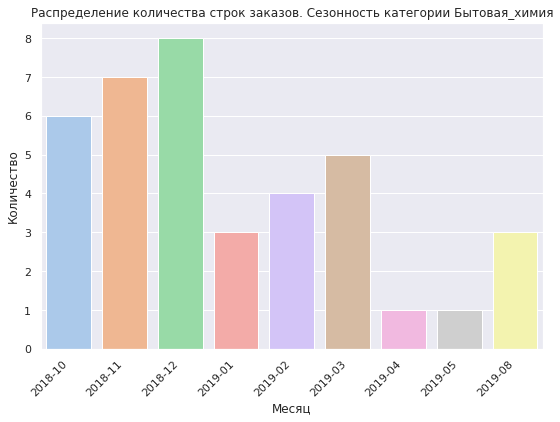

In [55]:
for category in df['product_category'].unique():
    countplot_creator(df[df['product_category'] == category], 'order_month', ('строк заказов. Сезонность категории ' + category), 'Месяц', (9, 6), 45)

Наличие сезонности можно отметить только в категории "Рассада" - рост весной, пик в июне

## Кластеризация клиентов 

На основании выделенных товарных категорий проведем сегментацию клиентов.  
Сегментацию проведем с помощью обучения без учителя - кластеризации.  
Подготовим данные:

In [56]:
df_clusters = df[['customer_id', 'quantity', 'price', 'total', 'product_category']]

Кодируем категориальные значения

In [57]:
df_clusters = pd.get_dummies(df_clusters, columns=["product_category"])

In [58]:
df_clusters.head()

,customer_id,quantity,price,total,product_category_Бытовая_техника,product_category_Бытовая_химия,product_category_Ванная,product_category_Дом,product_category_Кухня,product_category_Посуда,product_category_Рассада,product_category_Растение,product_category_Сумки,product_category_Хозтовары
0,ee47d746-6d2f-4d3c-9622-c31412542920,1,142.00,142.00,0,0,0,0,0,0,1,0,0,0
1,ee47d746-6d2f-4d3c-9622-c31412542920,1,194.00,194.00,0,0,0,0,0,0,1,0,0,0
22,f08d9018-438e-4e96-b519-f74c0302a433,1,89.00,89.00,0,0,0,0,0,0,1,0,0,0
23,f08d9018-438e-4e96-b519-f74c0302a433,1,169.00,169.00,0,0,0,0,0,0,1,0,0,0
24,f08d9018-438e-4e96-b519-f74c0302a433,1,101.00,101.00,0,0,0,0,0,0,1,0,0,0


In [59]:
df_clusters.rename(columns={'product_category_Бытовая_техника':'devices', 'product_category_Бытовая_химия':'chemicals',
       'product_category_Ванная':'bathroom', 'product_category_Дом':'house',
       'product_category_Кухня':'kitchen', 'product_category_Посуда':'dishes',
       'product_category_Рассада':'seedlings', 'product_category_Растение':'plants',
       'product_category_Сумки':'bags', 'product_category_Хозтовары':'household'}, inplace=True)

In [60]:
df_clusters.head()

,customer_id,quantity,price,total,devices,chemicals,bathroom,house,kitchen,dishes,seedlings,plants,bags,household
0,ee47d746-6d2f-4d3c-9622-c31412542920,1,142.00,142.00,0,0,0,0,0,0,1,0,0,0
1,ee47d746-6d2f-4d3c-9622-c31412542920,1,194.00,194.00,0,0,0,0,0,0,1,0,0,0
22,f08d9018-438e-4e96-b519-f74c0302a433,1,89.00,89.00,0,0,0,0,0,0,1,0,0,0
23,f08d9018-438e-4e96-b519-f74c0302a433,1,169.00,169.00,0,0,0,0,0,0,1,0,0,0
24,f08d9018-438e-4e96-b519-f74c0302a433,1,101.00,101.00,0,0,0,0,0,0,1,0,0,0


Сгруппируем данные по покупателям,  
найдем количество купленных товаров каждым покупателем, среднюю цену приобретаемых покупателем товаров, общую сумму денег, потраченную в магазине и % товаров, относящихся к определенной категории

In [61]:
df_clusters_grouped = df_clusters.groupby('customer_id').agg({
    'quantity':'sum', 'price':'mean', 'total':'sum', 'devices':'mean', 'chemicals':'mean', 'bathroom':'mean','house':'mean',
    'kitchen':'mean', 'dishes':'mean', 'seedlings':'mean', 'plants':'mean', 'bags':'mean', 'household':'mean'}).reset_index()

In [62]:
df_clusters_grouped.sample(10)

,customer_id,quantity,price,total,devices,chemicals,bathroom,house,kitchen,dishes,seedlings,plants,bags,household
2265,fb7421fb-53d1-46d8-bfaa-7f3f7c51e276,36,88.00,"3,168.00",0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
811,5c765452-f541-445f-988e-6311ac6fe8c9,3,135.00,405.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
2240,f887b214-b6b1-448f-a7d0-5351e08847f0,1,517.00,517.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
274,1eff322d-0aed-4ffe-88e8-04277371a304,1,134.00,134.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
870,62db160b-60fb-4bda-a642-3a9e5a2ac2d0,1,299.00,299.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
906,6644e5b4-9934-4863-9778-aaa125207701,1,269.00,269.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
1719,bfcd6fad-8426-4b6c-9585-46bf2452eedf,1,637.00,637.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
1577,b268d64e-cfc9-4be6-98ca-a6d7da7b9129,10,21.00,210.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
75,07c067bd-5df0-4291-872c-54cae69e4519,1,"3,224.00","3,224.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
139,0fa27f87-2f4e-4a22-acf0-53e5dd02654d,1,"1,049.00","1,049.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00


In [63]:
X = df_clusters_grouped[['quantity', 'price', 'total', 'devices', 'chemicals',
       'bathroom', 'house', 'kitchen', 'dishes', 'seedlings', 'plants', 'bags', 'household']]

Стандартизируем данные

In [64]:
scaler = StandardScaler()
X_st = scaler.fit_transform(X)

Построим матрицу расстояний на стандартизованной матрице признаков

In [65]:
linked = linkage(X_st, method = 'ward')

Построим дендрограмму

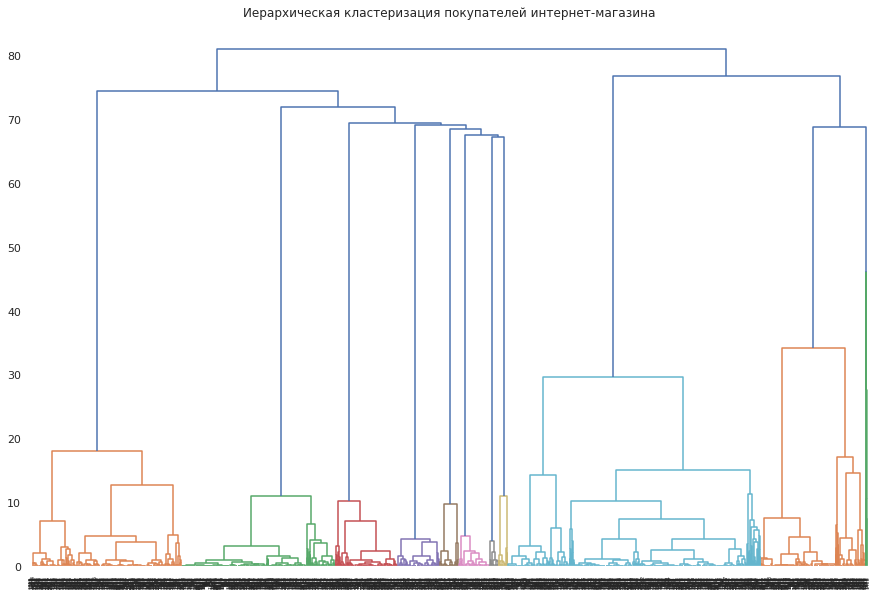

In [66]:
plt.figure(figsize=(15, 10))
dendrogram(linked, orientation='top')
plt.title('Иерархическая кластеризация покупателей интернет-магазина')
plt.show()

На основании полученной дендрограммы можно предположить, что покупателей стоит разделить на 4 кластера.

Спрогнозируем кластеры покупателей с помощью модели кластеризации на основании алгоритма K-Means.

In [67]:
km = KMeans(n_clusters = 4, random_state=0)

In [68]:
labels = km.fit_predict(X_st)

Добавим отнесение к кластеру в отдельный столбец датасета

In [69]:
X['cluster'] = labels

In [70]:
X.sample(3)

,quantity,price,total,devices,chemicals,bathroom,house,kitchen,dishes,seedlings,plants,bags,household,cluster
1589,1,"1,087.00","1,087.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,2
1185,3,115.00,345.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,3
1381,8,106.50,852.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,3


In [71]:
df_clusters_grouped = df_clusters_grouped.join(X['cluster'])

In [72]:
df_clusters_grouped.head()

,customer_id,quantity,price,total,devices,chemicals,bathroom,house,kitchen,dishes,seedlings,plants,bags,household,cluster
0,000d6849-084e-4d9f-ac03-37174eaf60c4,4,138.75,555.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,3
1,001cee7f-0b29-4716-b202-0042213ab038,1,442.00,442.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0
2,00299f34-5385-4d13-9aea-c80b81658e1b,2,457.00,914.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0
3,002d4d3a-4a59-406b-86ec-c3314357e498,1,"1,649.00","1,649.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,2
4,003bbd39-0000-41ff-b7f9-2ddaec152037,2,"1,162.00","2,324.00",0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1


In [73]:
df_clusters_grouped.loc[df_clusters_grouped['customer_id'] == '1d6c8c1f-a799-4418-9af2-1ded47d7a85c', 'cluster'] = 3

Изучим средние значения признаков для кластеров.

In [74]:
df_clusters_grouped.groupby('cluster').mean()

,quantity,price,total,devices,chemicals,bathroom,house,kitchen,dishes,seedlings,plants,bags,household
cluster,,,,,,,,,,,,,
0,2.94,904.53,"1,571.90",0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.96
1,7.14,482.66,"1,003.41",0.00,0.00,0.00,0.98,0.00,0.00,0.00,0.00,0.00,0.01
2,2.32,"1,759.50","3,008.79",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
3,6.02,271.61,906.30,0.00,0.03,0.06,0.00,0.10,0.13,0.48,0.19,0.00,0.00


Судя по средним значениям признаков в разрезе кластеров можно отметить:  
- Кластер 0 в основном покупает Хозтовары, чаще всего не более трех единиц товаров;​

- Кластер 1 чаще всех покупает товары из категории Дом, количество приобретаемых единиц больше, чем в других кластерах. Но сосредотачивается на относительно не дорогих товаров и приносит магазину малую часть дохода (оборота);​

- Кластер 2 - покупатели товаров из категории Сумки, приносят магазину самый высокий доход с покупателя;​

- Кластер 3 приобретает товары из разных категорий, но почти половину покупок этого кластера составляет рассада. Приобретают более дешевые товары, чем другие кластеры, соответственно, принося магазину наименьшее количество дохода с одного покупателя.

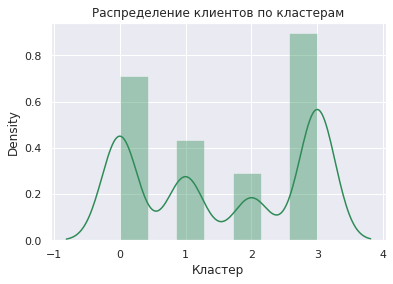

In [75]:
sns.distplot(df_clusters_grouped['cluster'], color='#2E8B57')
plt.xlabel('Кластер')
plt.title('Распределение клиентов по кластерам')
plt.show()

К кластеру 3 отнесено больше всего покупателей. Меньше всего покупателей попало в кластер 2. 

То есть наибольшую часть составляют покупатели, которые приносят магазину наименьшее количество дохода с покупателя.  
А те покупатели, которые приносят наибольшее количество дохода с покупателя, составляют наименьшую часть.

In [76]:
df = df.merge(df_clusters_grouped[['customer_id', 'cluster']], on='customer_id', how='left')

In [77]:
df.head()

,date,customer_id,order_id,product,quantity,price,purchase_month,order_month,total,product_category,cluster
0,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке алое вера, d12, h30",1,142.00,2018-10-01,2018-10,142.00,Рассада,3
1,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке кофе арабика, d12, h25",1,194.00,2018-10-01,2018-10,194.00,Рассада,3
2,2018-10-02 11:00:00,f08d9018-438e-4e96-b519-f74c0302a433,14480,"многолетнее растение тимьян-чабрец розовый объем 0,5 л",1,89.00,2018-10-01,2018-10,89.00,Рассада,3
3,2018-10-02 11:00:00,f08d9018-438e-4e96-b519-f74c0302a433,14480,"рассада зелени для кухни базилик тонус, кассета по 6шт",1,169.00,2018-10-01,2018-10,169.00,Рассада,3
4,2018-10-02 11:00:00,f08d9018-438e-4e96-b519-f74c0302a433,14480,рассада зелени для кухни мелиссы в горшке диам. 9 см,1,101.00,2018-10-01,2018-10,101.00,Рассада,3


Посмотрим на отличия в категориях по кластерам:

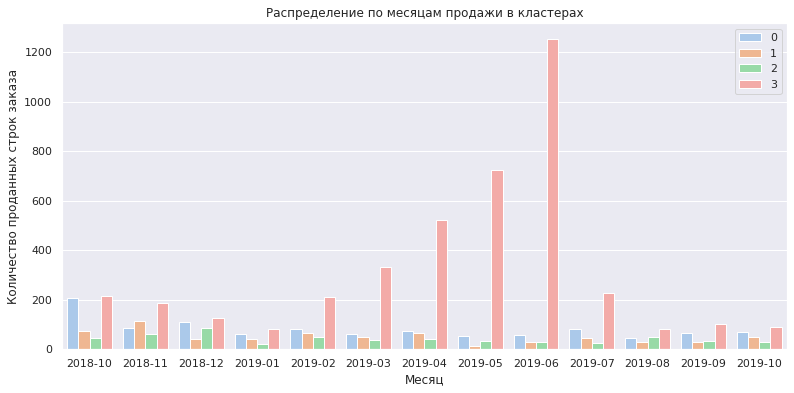

In [78]:
plt.figure(figsize=(13, 6))
sns.countplot(data=df, x='order_month', hue='cluster', palette='pastel')
plt.xlabel('Месяц')
plt.ylabel('Количество проданных строк заказа')
plt.title('Распределение ' + 'по месяцам продажи' + ' в кластерах')
plt.legend()
plt.show()

Снова можно увидеть сезонность в рассаде. 

In [79]:
categories_clusters = df.groupby(['product_category', 'cluster']).agg({
    'customer_id':'nunique', 'order_id':'nunique', 'product':'nunique', 
    'quantity':'sum', 'price':'mean', 'total':'sum'})

In [80]:
categories_clusters = categories_clusters.reset_index()
categories_clusters.rename(columns={
    'customer_id':'customer_qty', 'order_id':'order_qty', 'product':'product_qty', 
    'quantity':'sold_items', 'price':'avg_price'}, inplace=True)
categories_clusters['avg_check'] = categories_clusters['total'] / categories_clusters['order_qty']

In [81]:
categories_clusters

,product_category,cluster,customer_qty,order_qty,product_qty,sold_items,avg_price,total,avg_check
0,Бытовая_техника,0,28,32,30,36,902.00,"30,772.00",961.62
1,Бытовая_техника,1,1,1,2,2,820.50,"1,641.00","1,641.00"
2,Бытовая_техника,2,1,3,3,3,716.67,"2,150.00",716.67
3,Бытовая_техника,3,1,1,1,1,292.00,292.00,292.00
4,Бытовая_химия,0,1,1,2,2,243.00,486.00,486.00
5,Бытовая_химия,2,1,1,1,1,82.00,82.00,82.00
6,Бытовая_химия,3,27,26,29,81,216.49,"15,602.00",600.08
7,Ванная,0,2,2,2,3,"1,311.50","4,272.00","2,136.00"
8,Ванная,2,1,2,2,2,295.50,591.00,295.50
9,Ванная,3,55,58,37,80,746.43,"60,233.00","1,038.50"


Посмотрим в разрезе категорий товаров и сегментов покупателей на продажи

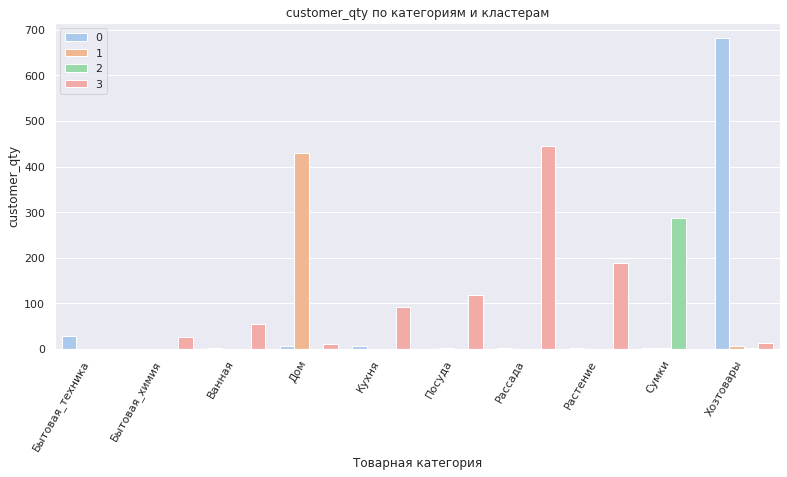

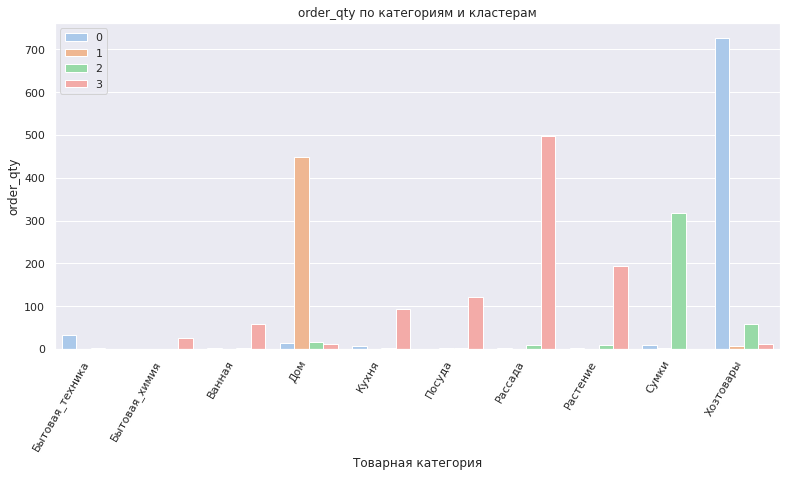

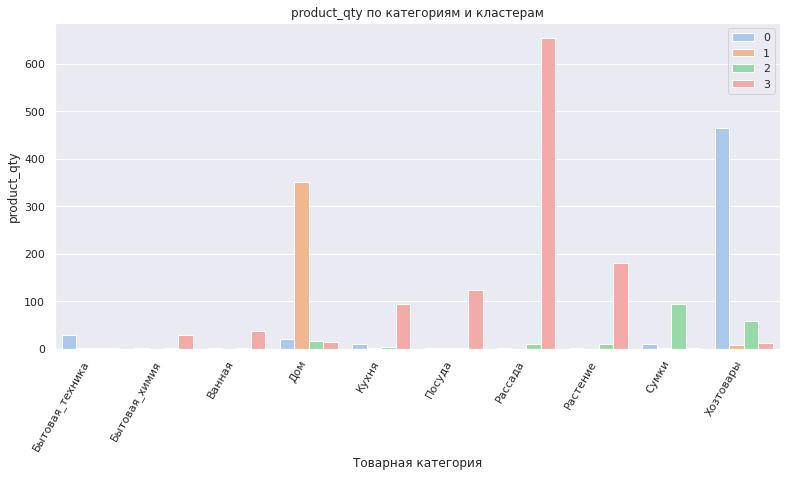

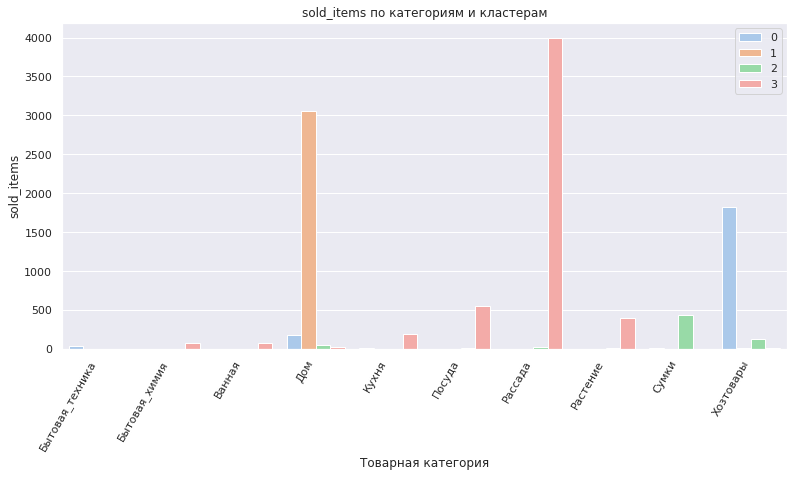

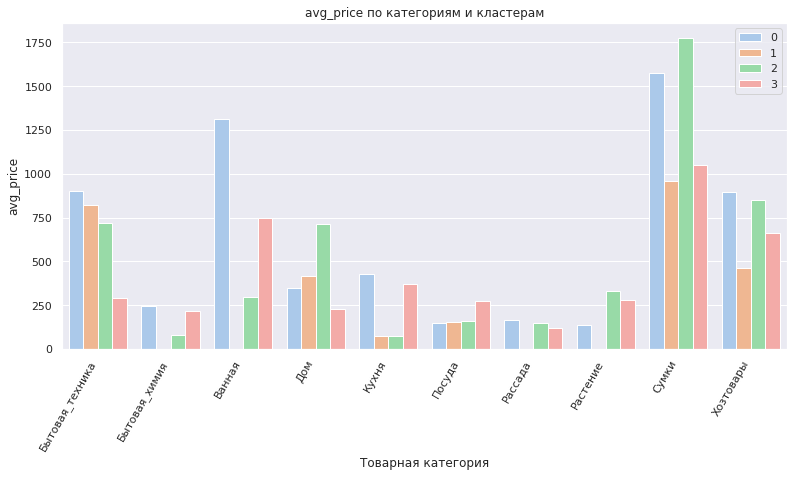

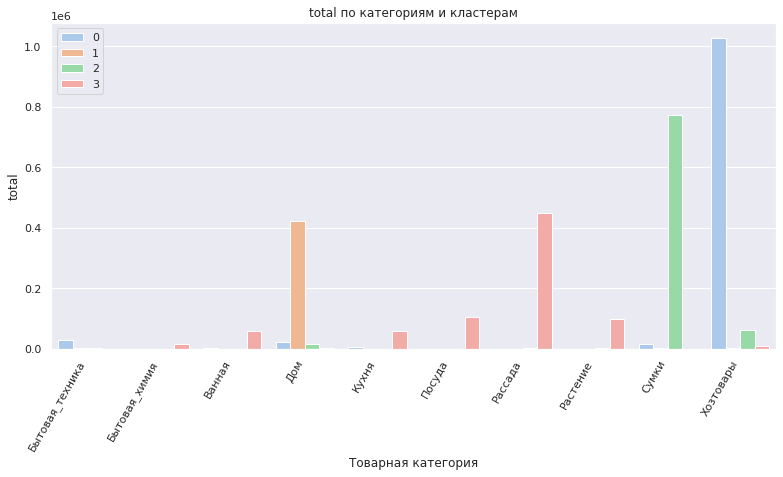

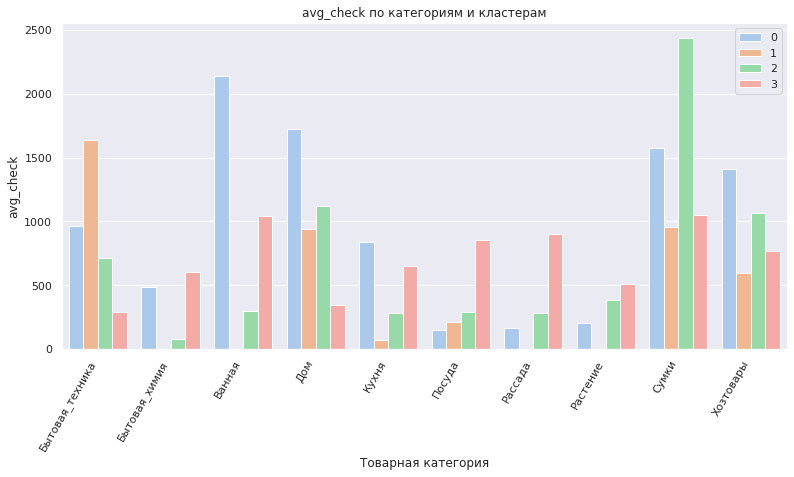

In [82]:
parameters = ['customer_qty', 'order_qty', 'product_qty', 'sold_items', 'avg_price', 'total', 'avg_check']
for parameter in parameters:
    plt.figure(figsize=(13, 6))
    sns.barplot(data=categories_clusters, x='product_category', y=parameter, hue='cluster', palette='pastel')
    plt.xlabel('Товарная категория')
    plt.xticks(rotation=60, ha="right")
    plt.title(parameter + ' по категориям и кластерам')
    plt.legend()
    plt.show()

ВЫВОД:  
Диаграммы количества покупателей по категориям в разных сегментах и количества заказов похожи, так как на одного покупателя чаще всего приходится только один заказ.   
В категории Рассада представлено и куплено максимальное количество товаров.   
Наиболее дорогие товары в категории Сумки. Наиболее прибыльные категории Сумки и Хозтовары.   
Средний чек отличается по сегментам покупателей.

## Оценка корректности сегментации покупателей с помощью проверки гипотез

Оценим корректность сегментации покупателей с помощью проверки гипотез. Посмотрим статистическую значимость различия метрик в выделенных сегментах покупателей.

### Проверка гипотезы о различии средних чеков покупателей разных сегментов

Проверим гипотезу о различии сегментов в среднем чеке 

Подготовим данные

In [83]:
cluster_avg_check = df.groupby('cluster').agg({'order_id':'nunique', 'total':'sum'}).reset_index()
cluster_avg_check['avg_check'] = cluster_avg_check['total']/cluster_avg_check['order_id']
cluster_avg_check

,cluster,order_id,total,avg_check
0,0,781,"1,108,186.00","1,418.93"
1,1,457,"431,467.00",944.13
2,2,418,"863,524.00","2,065.85"
3,3,960,"802,984.00",836.44


In [84]:
cluster_avg_check_by_orders = df.groupby(['cluster', 'order_id']).agg({'total':'sum'}).reset_index()
cluster_avg_check_by_orders

,cluster,order_id,total
0,0,63963,"1,837.00"
1,0,64896,"1,574.00"
2,0,66760,418.00
3,0,68474,"16,495.00"
4,0,68478,269.00
...,...,...,...
2611,3,73148,127.00
2612,3,73151,314.00
2613,3,73154,112.00
2614,3,73155,329.00


Проверка гипотезы: средний чек покупателей в разных кластерах различается

Сформулируем гипотезы:  
**Нулевая гипотеза (H0)** - статистически значимых отличий в среднем чеке между кластерами нет.  
**Альтернативная (H1)** - между кластерами есть статистически значимые отличия в среднем чеке.

Проверим имеющиеся данные на нормальность распределения при помощи критерия Шапиро-Уилка.  
Нулевая гипотеза h0 - распределение нормально.  
Альтернативная h1 - распределение не нормально.

In [85]:
for cluster in cluster_avg_check_by_orders['cluster'].unique():
    print('Кластер ', cluster)
    alpha = 0.05  # критический уровень статистической значимости

    results = st.shapiro(cluster_avg_check_by_orders[cluster_avg_check_by_orders['cluster'] == cluster]['total'])
    p_value = results[1]

    print('p-значение = {0:.5f}'.format(p_value))

    if p_value < alpha:
        print('Отвергаем нулевую гипотезу: распределение данных о выручке с заказов в кластере ', cluster, ' не нормально')
    else:
        print('Не получилось отвергнуть нулевую гипотезу, распределение данных о выручке с заказов в кластере ', cluster, ' нормально') 
    print('================================')

Кластер  0
p-значение = 0.00000
Отвергаем нулевую гипотезу: распределение данных о выручке с заказов в кластере  0  не нормально
Кластер  1
p-значение = 0.00000
Отвергаем нулевую гипотезу: распределение данных о выручке с заказов в кластере  1  не нормально
Кластер  2
p-значение = 0.00000
Отвергаем нулевую гипотезу: распределение данных о выручке с заказов в кластере  2  не нормально
Кластер  3
p-значение = 0.00000
Отвергаем нулевую гипотезу: распределение данных о выручке с заказов в кластере  3  не нормально


Распределения не являются нормальными, рассчет статистической значимости различий в среднем чеке между кластерами произведем с помощью теста Манна-Уитни для двусторонней альтернативной гипотезы `alternative="two-sided"`. Также вычислим относительное различие в среднем чеке между кластерами.

Рассчитаем статистическую значимость различия средних чеков кластеров 0, 1, 2 и кластера 3.

In [86]:
clusters_compare = [0, 1, 2]
for cluster in clusters_compare:
    print('Сравнение кластеров ', cluster, ' и 3')
    print(
        'p-value = {0:.3f}'.format(
            st.mannwhitneyu(
                cluster_avg_check_by_orders[cluster_avg_check_by_orders['cluster'] == cluster]['total'],
                cluster_avg_check_by_orders[cluster_avg_check_by_orders['cluster'] == 3]['total'],
                alternative="two-sided"
            )[1]
        )
    )

    print(
        "Относительное отличие средних чеков = {0:.1%}".format(
            cluster_avg_check_by_orders[cluster_avg_check_by_orders['cluster'] == 3]['total'].mean()
            / cluster_avg_check_by_orders[cluster_avg_check_by_orders['cluster'] == cluster]['total'].mean()
            - 1
        )
    )
    print('============================')

Сравнение кластеров  0  и 3
p-value = 0.000
Относительное отличие средних чеков = -41.1%
Сравнение кластеров  1  и 3
p-value = 0.002
Относительное отличие средних чеков = -11.4%
Сравнение кластеров  2  и 3
p-value = 0.000
Относительное отличие средних чеков = -59.5%


P-value значительно меньше 0,05.  
**ВЫВОД**: Значит, следует **отвергнуть** нулевую гипотезу **H0** и считать, что ***в средних чеках кластеров есть различия***.

### Проверка гипотезы о различии среднемесячного объема продаж (оборота магазина) в разных сегментах

Подготовим данные

In [87]:
clusters_month_income = df.groupby(['cluster', 'order_month']).agg({'total':'sum'}).reset_index()

In [88]:
clusters_month_income

,cluster,order_month,total
0,0,2018-10,"194,959.00"
1,0,2018-11,"83,656.00"
2,0,2018-12,"101,246.00"
3,0,2019-01,"79,042.00"
4,0,2019-02,"82,166.00"
5,0,2019-03,"72,244.00"
6,0,2019-04,"75,520.00"
7,0,2019-05,"72,386.00"
8,0,2019-06,"60,514.00"
9,0,2019-07,"90,446.00"


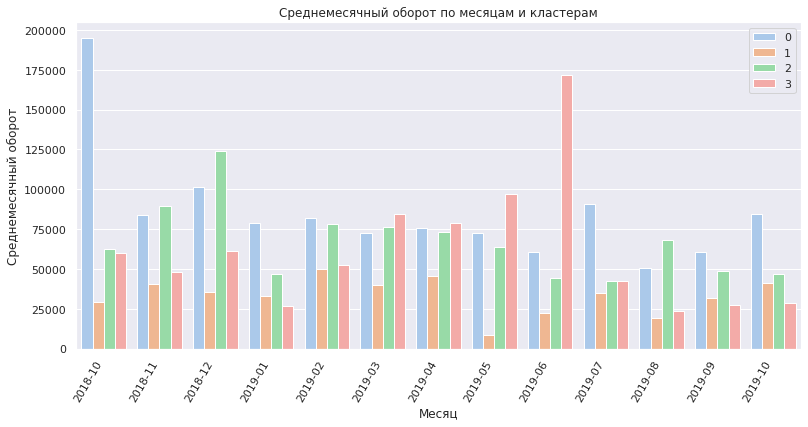

In [89]:
plt.figure(figsize=(13, 6))
sns.barplot(data=clusters_month_income, x='order_month', y='total', hue='cluster', palette='pastel')
plt.xlabel('Месяц')
plt.ylabel('Среднемесячный оборот')
plt.xticks(rotation=60, ha="right")
plt.title('Среднемесячный оборот по месяцам и кластерам')
plt.legend()
plt.show()

Проверка гипотезы: среднемесячный объем продаж (оборот магазина) в разных кластерах различается

Сформулируем гипотезы:  
**Нулевая гипотеза (H0)** - статистически значимых отличий в среднемесячном обороте между кластерами нет.   
**Альтернативная (H1)** - между кластерами есть статистически значимые отличия в среднемесячном обороте.

Проверим имеющиеся данные на нормальность распределения при помощи критерия Шапиро-Уилка.  
Нулевая гипотеза h0 - распределение нормально.  
Альтернативная h1 - распределение не нормально.

In [90]:
for cluster in clusters_month_income['cluster'].unique():
    print('Кластер ', cluster)
    alpha = 0.05  # критический уровень статистической значимости

    results = st.shapiro(clusters_month_income[clusters_month_income['cluster'] == cluster]['total'])
    p_value = results[1]

    print('p-значение = {0:.5f}'.format(p_value))

    if p_value < alpha:
        print('Отвергаем нулевую гипотезу: распределение данных о выручке с заказов в кластере ', cluster, ' не нормально')
    else:
        print('Не получилось отвергнуть нулевую гипотезу, распределение данных о выручке с заказов в кластере ', cluster, ' нормально') 
    print('================================')

Кластер  0
p-значение = 0.00036
Отвергаем нулевую гипотезу: распределение данных о выручке с заказов в кластере  0  не нормально
Кластер  1
p-значение = 0.74766
Не получилось отвергнуть нулевую гипотезу, распределение данных о выручке с заказов в кластере  1  нормально
Кластер  2
p-значение = 0.06329
Не получилось отвергнуть нулевую гипотезу, распределение данных о выручке с заказов в кластере  2  нормально
Кластер  3
p-значение = 0.01410
Отвергаем нулевую гипотезу: распределение данных о выручке с заказов в кластере  3  не нормально


Проверим гипотезу, что среднемесячный оборот в кластерах 1 и 2 различается, используя Т-тест.  

Произведем проверку дисперсии выборок, определим, с каким значением параметра equal_var проводить проверку гипотезы через T-критерий Стьюдента. Проведем стат.тест Левене:

In [91]:
st.levene(clusters_month_income[clusters_month_income['cluster'] == 1]['total'], 
          clusters_month_income[clusters_month_income['cluster'] == 2]['total'], 
          center='mean')

LeveneResult(statistic=3.5576248073978807, pvalue=0.07143098982464467)

Полученное значение pvalue больше 0,05. Это означает, что высока вероятность того, что дисперсия выборок одинакова.
При проведении проверки гипотезы через T-критерий Стьюдента необходимо использовать значение параметра equal_var = True

Критический уровень статистической значимости зададим 0.05, если p-value окажется меньше него - отвергнем гипотезу H0.

In [92]:
alpha = 0.05
results = st.ttest_ind(
    clusters_month_income[clusters_month_income['cluster'] == 1]['total'], 
    clusters_month_income[clusters_month_income['cluster'] == 2]['total'],
    equal_var = True)

print('среднемесячный оборот в кластере 1: ', clusters_month_income[clusters_month_income['cluster'] == 1]['total'].mean())
print('среднемесячный оборот в кластере 2: ', clusters_month_income[clusters_month_income['cluster'] == 2]['total'].mean())
print()
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

среднемесячный оборот в кластере 1:  33189.769230769234
среднемесячный оборот в кластере 2:  66424.92307692308

p-значение: 9.188530930124315e-05
Отвергаем нулевую гипотезу


pvalue значительно меньше заданного уровня статистической значимости alpha.  
**ВЫВОД**: Между кластерами 1 и 2 есть статистически значимые отличия в среднемесячном обороте.

Проверим гипотезу, что среднемесячный оборот в кластерах 0 и 3 различается, с помощью теста Манна-Уитни для двусторонней альтернативной гипотезы alternative="two-sided". Также вычислим относительное различие в среднемесячном обороте между кластерами.

Сформулируем гипотезы:  
Нулевая гипотеза (H0) - статистически значимых отличий в среднемесячном обороте между кластерами 0 и 3 нет.  
Альтернативная (H1) - между кластерами есть статистически значимые отличия в среднемесячном обороте.

In [93]:
print(
    'p-value = {0:.3f}'.format(
        st.mannwhitneyu(
            clusters_month_income[clusters_month_income['cluster'] == 0]['total'],
            clusters_month_income[clusters_month_income['cluster'] == 3]['total'],
            alternative="two-sided"
        )[1]
    )
)

print(
    "Относительное отличие средних чеков = {0:.1%}".format(
        clusters_month_income[clusters_month_income['cluster'] == 0]['total'].mean()
        / clusters_month_income[clusters_month_income['cluster'] == 3]['total'].mean()
         - 1
    )
)

p-value = 0.036
Относительное отличие средних чеков = 38.0%


P-value меньше 0,05.  
**ВЫВОД**: Значит, следует отвергнуть нулевую гипотезу и считать, что  в среднемесячном обороте между кластерами 0 и 3 есть различия.

## Выводы и рекомендации

В рамках проведенного исследования в ассортименте магазина было выделено 10 товарных категорий.  
На основании выделенных товарных категорий и анализа продаж магазина за 13 месяцев было проведено сегментирование покупателей на 4 кластера. Проверка гипотез о наличии статистической значимости различий метрик в сегментах подтвердила возможность использования сегментации для персонализированных предложений клиентам.  
- Кластер 0 в основном покупает Хозтовары, чаще всего не более трех единиц товаров;  
- Кластер 1 чаще всех покупает товары из категории Дом, количество приоретаемых единиц больше, чем в других кластерах. Но сосредотачивается на относительно не дорогиз товаров и приносит магазину малую часть дохода (оборота);  
- Кластер 2 - покупатели товаров из категории Сумки, приносят магазну самый высокий доход с покупателя;  
- Кластер 3 приобретает товары из разных категорий, но почти половину покупок этого кластера составляет рассада. Приобретают более дешевые товары, чем другие кластеры, соотетственно принося магазину наименьшее количество дохода с одного покупателя.  

К кластеру 3 отнесено больше всего покупателей. Меньше всего покупателей попало в кластер 2.  
То есть наибольшую часть составляют покупатели, которые приносят магазину наименьшее количество дохода с покупателя.  
А те покупатели, которые приносят наибольшее количество дохода с покупателя, составляют наименьшую часть.  
Персонализированные предложения по кластерам необходимо формировать исходя из основной категории сегмента. А также магазину стоит наращивать аудиторию сегмента 2, которая приносит магазину самый высокий доход с покупателя.

## Дополнительные материалы

Презентация - https://yadi.sk/i/g5R3hMyUbJ1NRQ  
Дашборд - https://public.tableau.com/views/ecommerce_final_project/Dashboard1?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link